In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from numpy import mean

In [248]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

data_train = pd.read_csv("application_train.csv", index_col="SK_ID_CURR")
data_test = pd.read_csv("application_test.csv", index_col="SK_ID_CURR")

# EDA

In [249]:
print("50 observations sample:")
data_train[565:615]

50 observations sample:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100651,0,Cash loans,F,Y,N,0,157500.0,634482.0,20596.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-12838,-2271,-27.0,-1164,10.0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,3.0
100652,0,Cash loans,F,Y,Y,0,130500.0,995562.0,54684.0,922500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.035792,-22021,365243,-14183.0,-4596,4.0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
100653,0,Cash loans,F,N,Y,1,247500.0,755856.0,38722.5,652500.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.009657,-12394,-853,-6408.0,-4913,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
100654,0,Cash loans,F,N,Y,2,135000.0,427500.0,19939.5,427500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.028663,-11767,-3808,-5836.0,-4195,NaN,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100655,0,Revolving loans,M,N,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029,-19763,-12143,-1928.0,-3302,NaN,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100656,0,Cash loans,F,N,Y,0,54000.0,312768.0,13378.5,270000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.002042,-20419,365243,-10019.0,-2382,NaN,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100657,0,Cash loans,F,N,N,0,135000.0,414792.0,16357.5,315000.0,Unaccompanied,Working,Lower secondary,Married,House / apartment,0.011657,-19215,-4556,-7826.0,-2762,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100658,0,Cash loans,F,N,N,1,189000.0,215640.0,11695.5,180000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.010966,-8948,-1381,-8890.0,-1561,NaN,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
100659,0,Cash loans,F,N,Y,0,90000.0,603792.0,19606.5,504000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010147,-18926,-975,-3202.0,-2454,NaN,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
print("Number of observations: " + str(len(data_train)))
print("Number of variables: " + str(len(data_train.columns)))

print("Missing values:")
def missing_values_table(dataset):
    missing_value = dataset.isnull().sum()
    percentage = 100 * missing_value / len(dataset)
    table = pd.concat([missing_value, percentage], axis=1)
    table = table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})
    table = table[table.iloc[:,1] != 0].sort_values('Percentage of Total Values', ascending=False).round(1)
    return table

missing_values_table(data_train)

Number of observations: 307511
Number of variables: 121
Missing values:


,Missing Values,Percentage of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [251]:
print("Duplicates:")
data_train[data_train.duplicated()]

Duplicates:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [252]:
print("Data types: ")
set(data_train.dtypes)

Data types: 


{dtype('int64'), dtype('float64'), dtype('O')}

In [253]:
print("Description of all variables:")
pd.set_option("display.max_columns", 121)
data_train.describe(include='all')

Description of all variables:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [254]:
categorical_variables = set(data_train.select_dtypes(include="object"))
continuous_variables = set()
discrete_variables = set()

for column in data_train.columns:
    if column not in categorical_variables:
        if data_train[column].nunique() <= 7:
            discrete_variables.add(column)
        else:
            continuous_variables.add(column)

numerical_variables = discrete_variables | continuous_variables

In [255]:
print("Categorical variables:")
categorical_variables

Categorical variables:


{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START'}

In [256]:
print("Numeric(continuous) variables:")
continuous_variables

Numeric(continuous) variables:


{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'HOUR_APPR_PROCESS_START',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTME

In [257]:
print("Numeric(discrete) variables:")
discrete_variables

Numeric(discrete) variables:


{'AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'TARGET'}

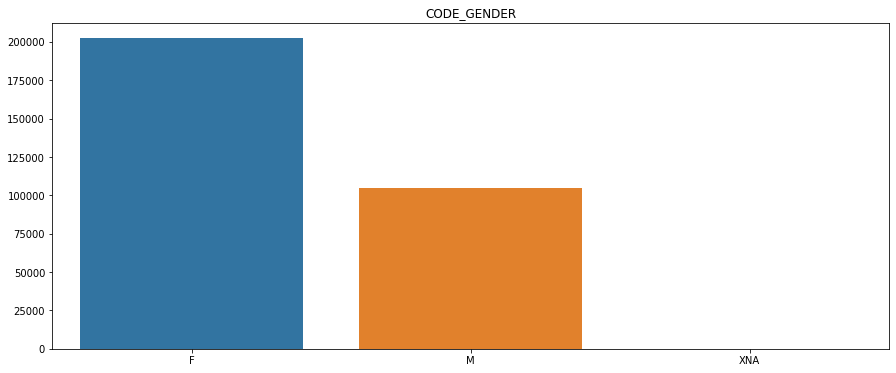

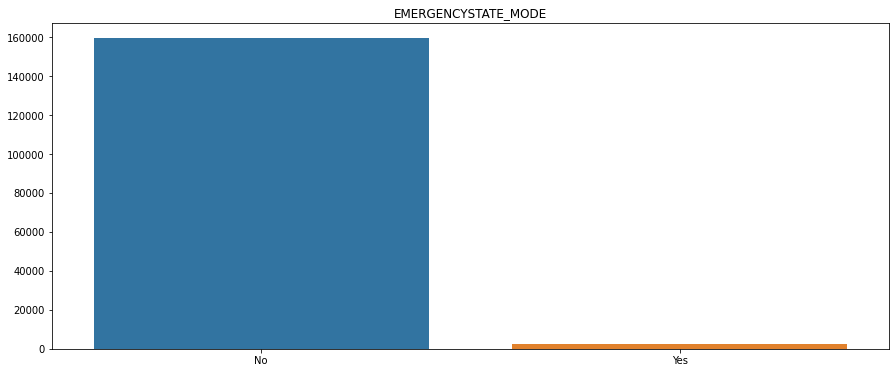

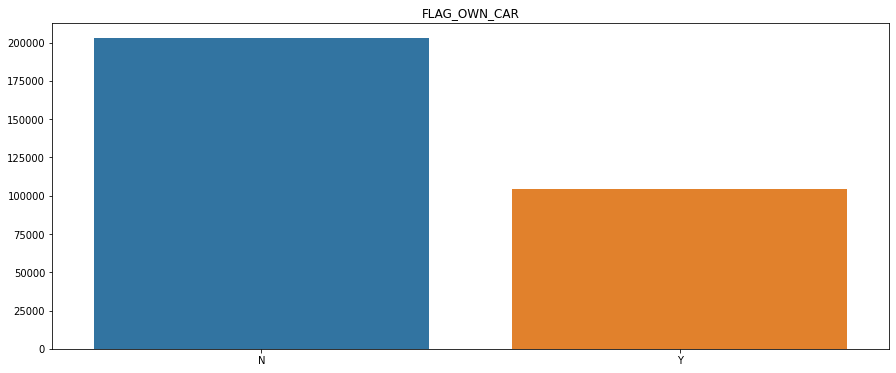

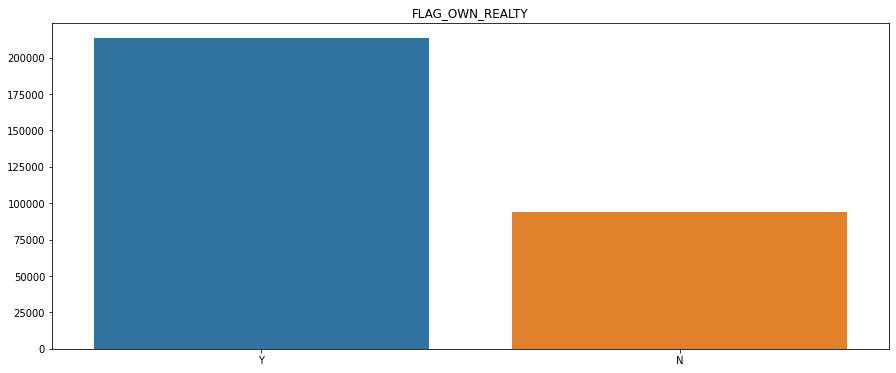

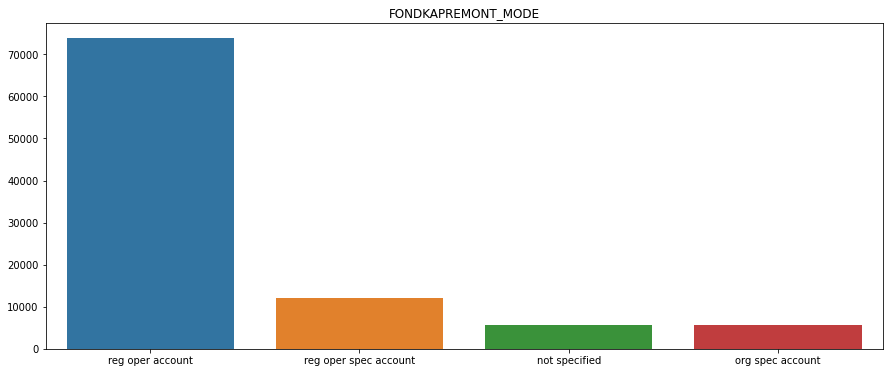

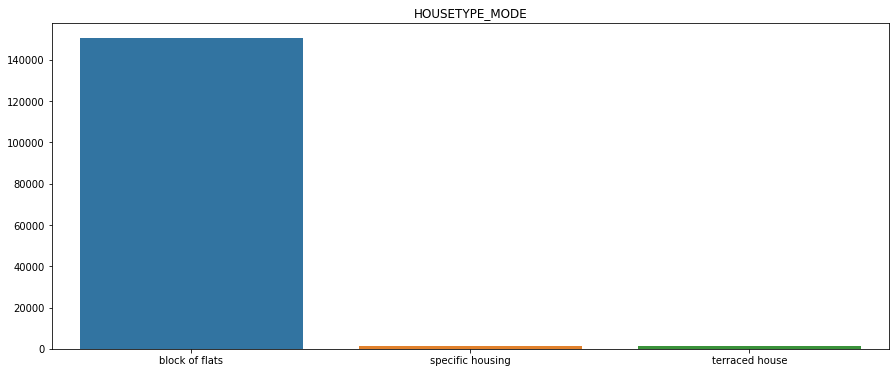

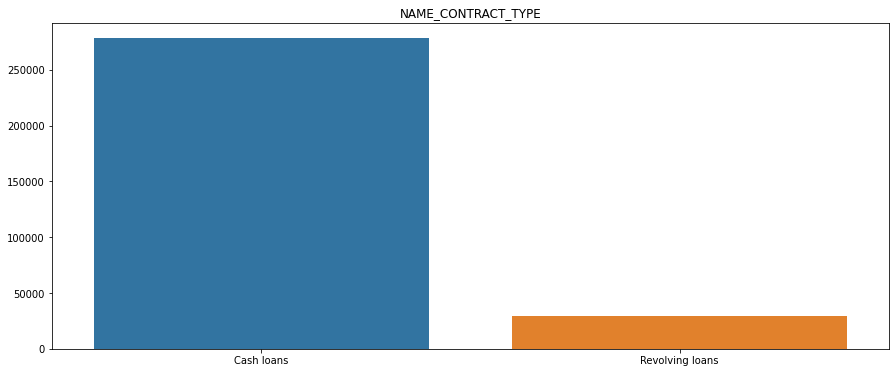

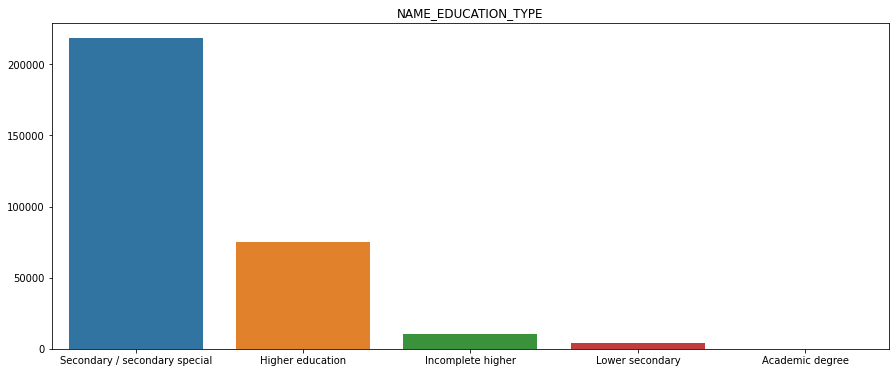

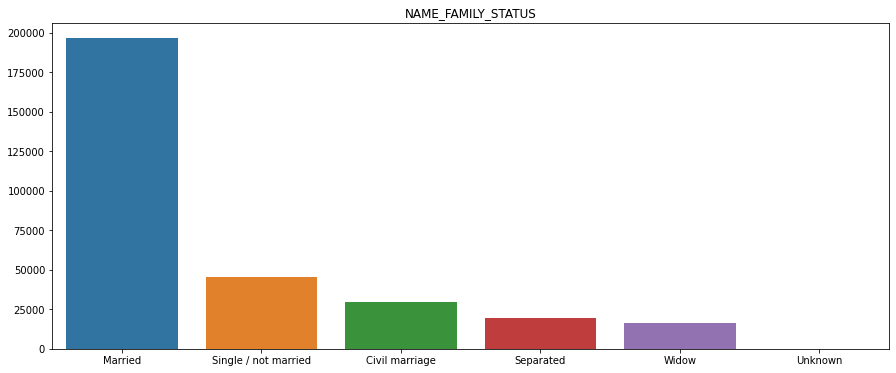

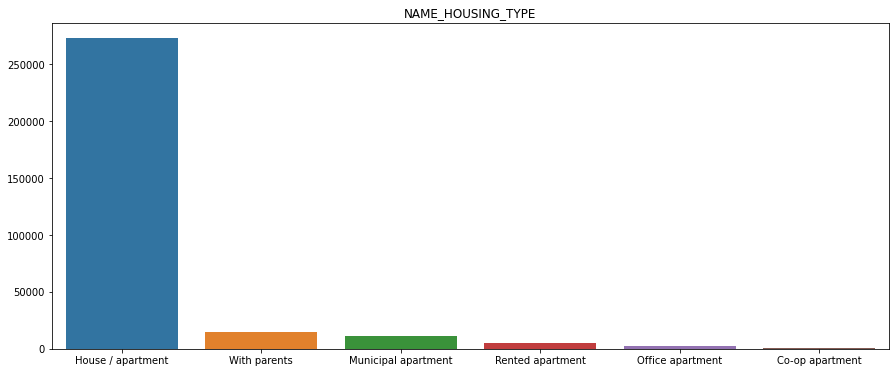

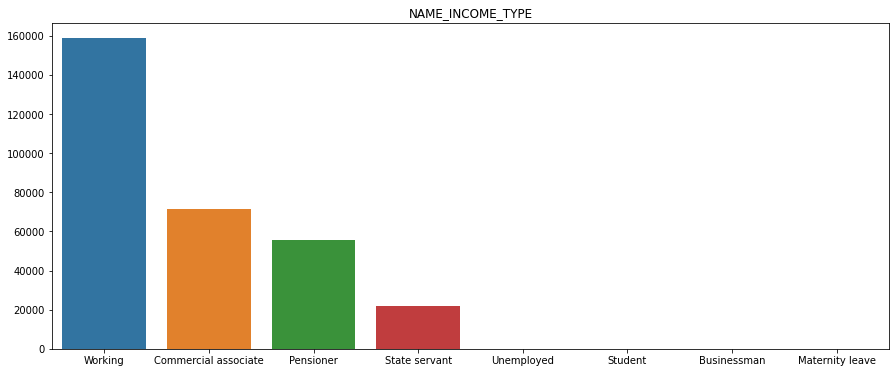

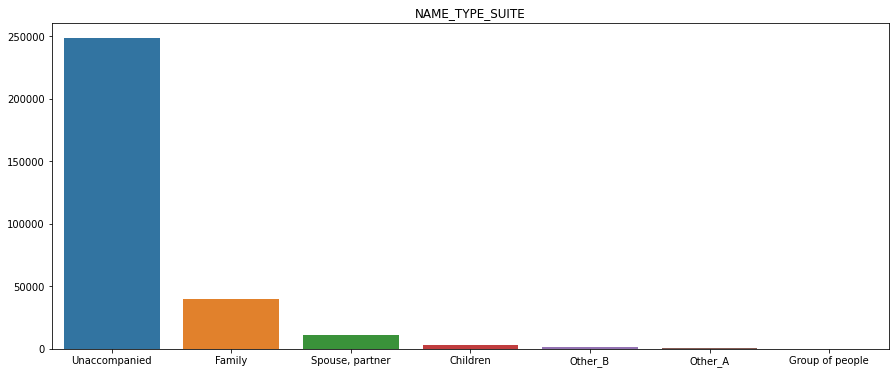

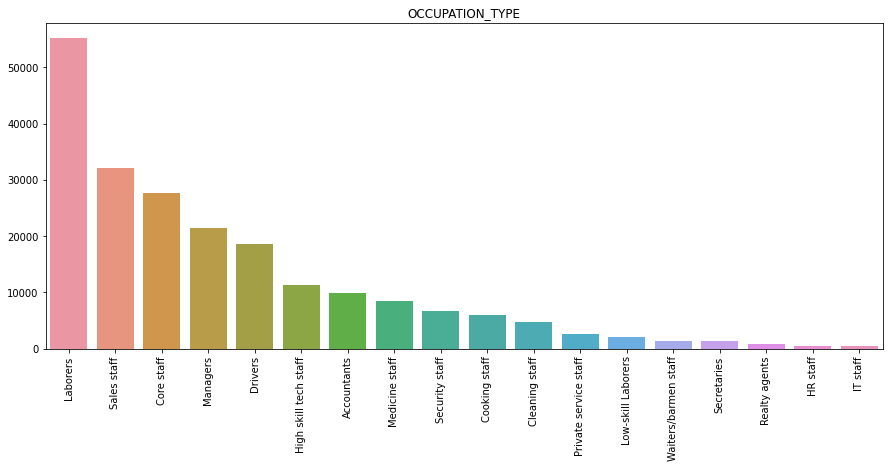

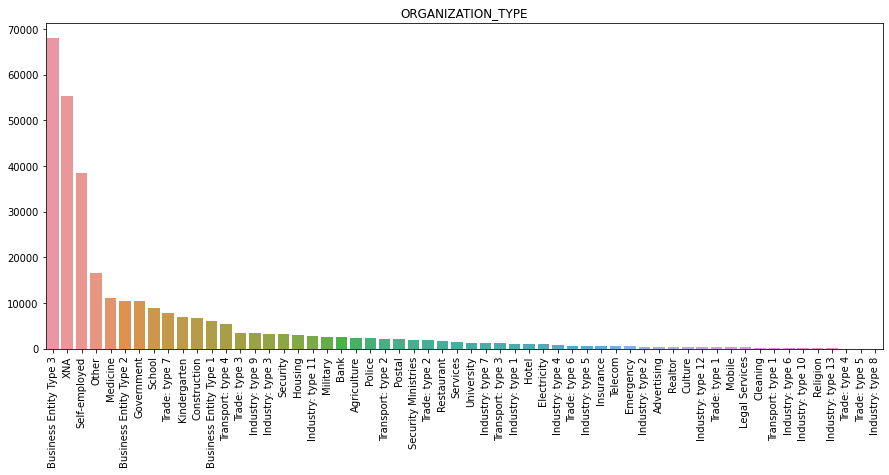

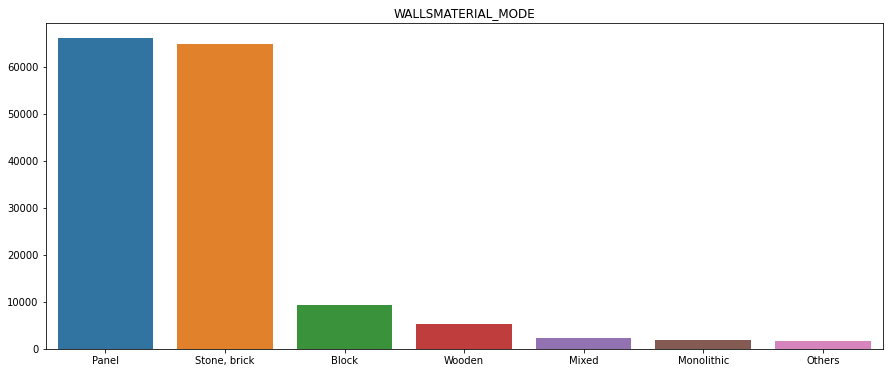

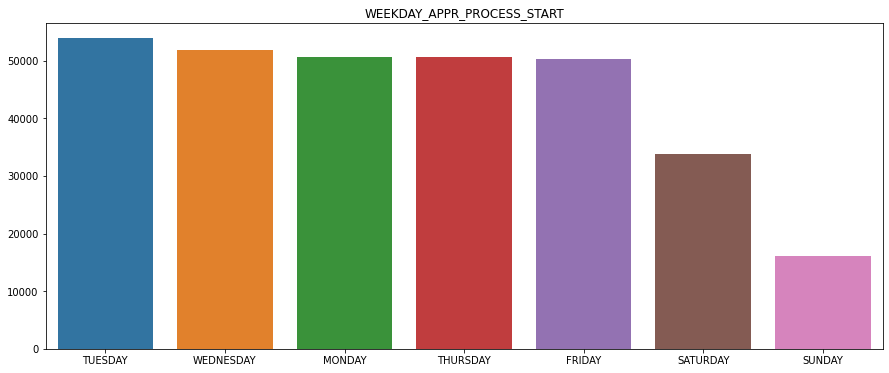

In [258]:
def plot_categorical_or_discrete(data, col, x_angle=0, title=''):
    plot_data = data[col].value_counts()
    plt.figure(figsize=[15, 6])
    sns.barplot(x=plot_data.index, y=plot_data.values)
    plt.xticks(rotation=x_angle)
    plt.title(title)
    plt.show()
    
for col in sorted(list(categorical_variables)):
    x_angle = 0
    if data_train[col].nunique() > 10:
        x_angle = 90
    plot_categorical_or_discrete(data_train, col, title=col, x_angle=x_angle)

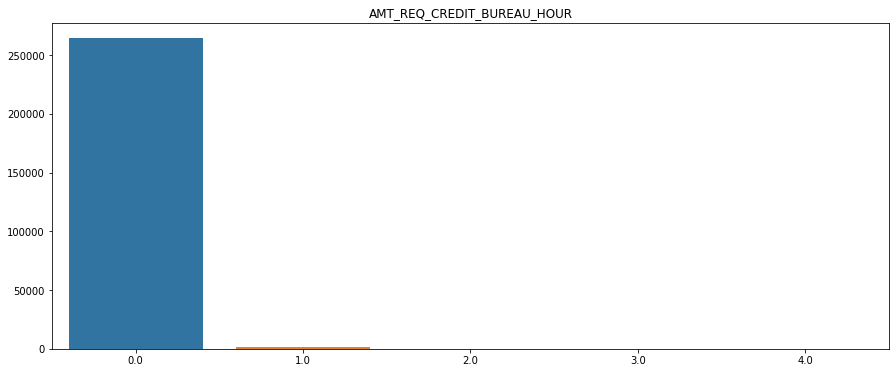

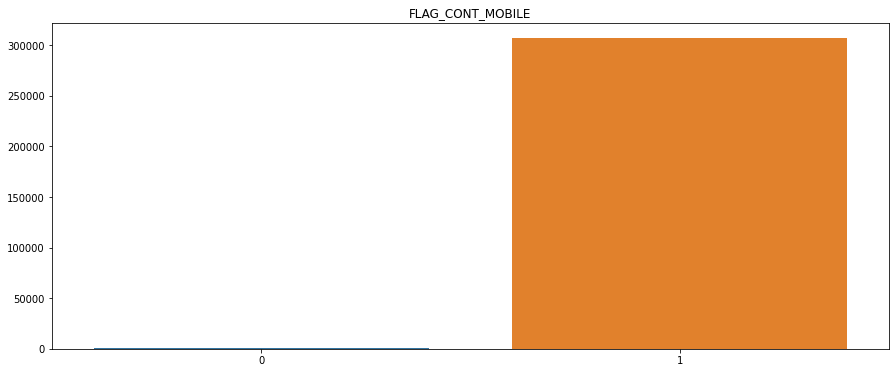

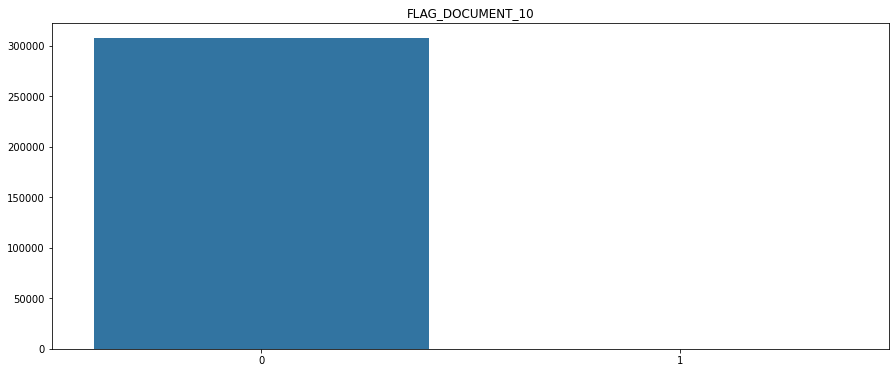

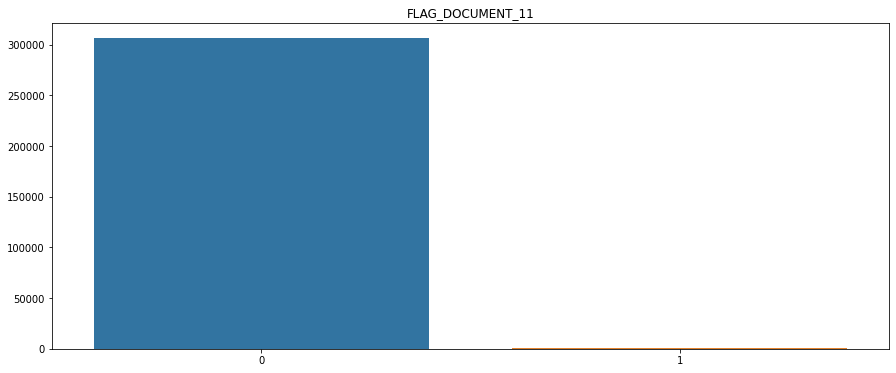

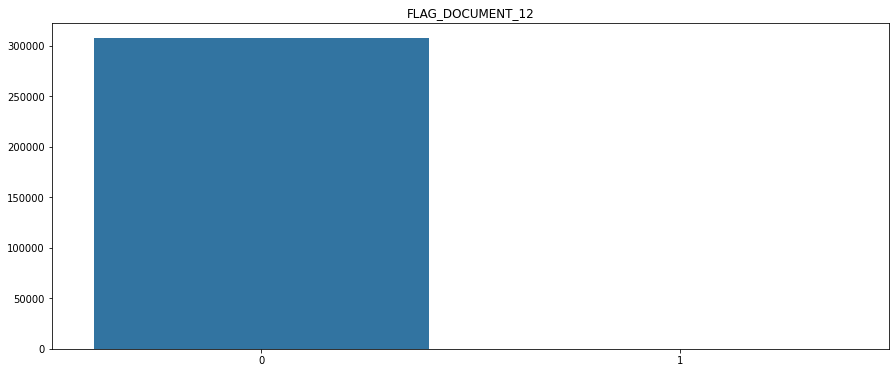

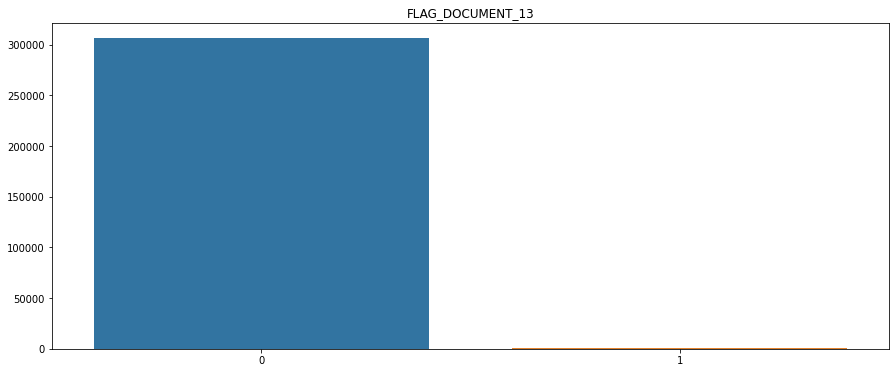

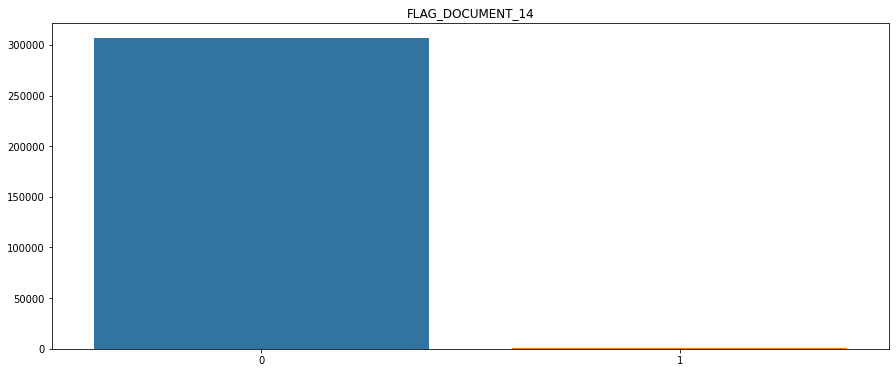

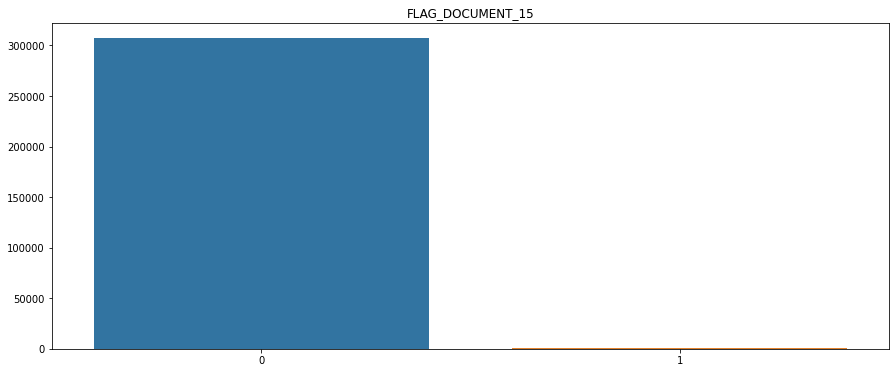

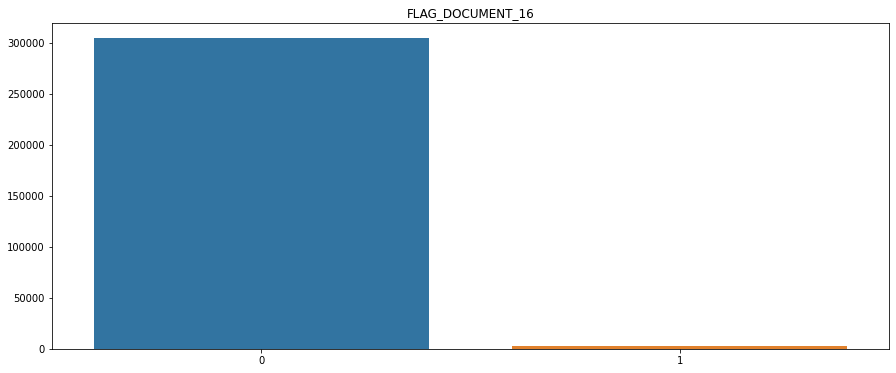

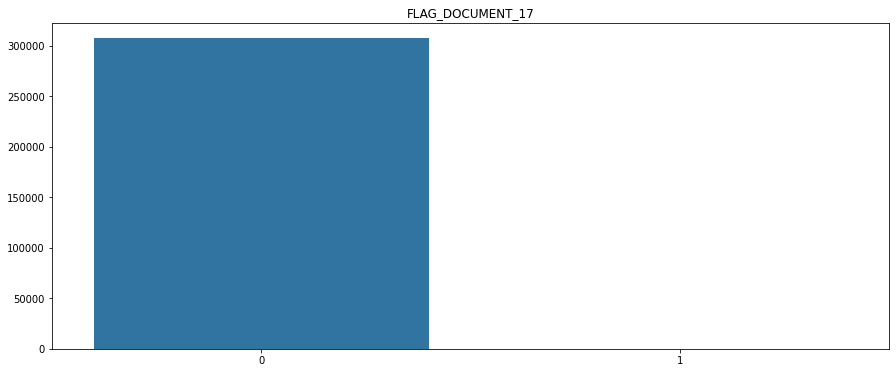

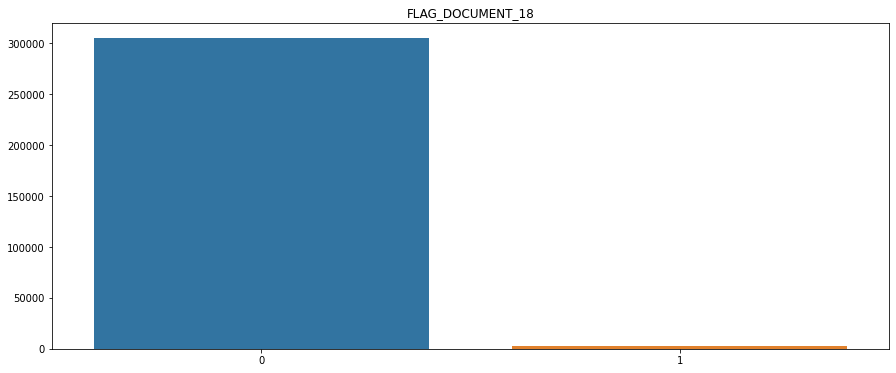

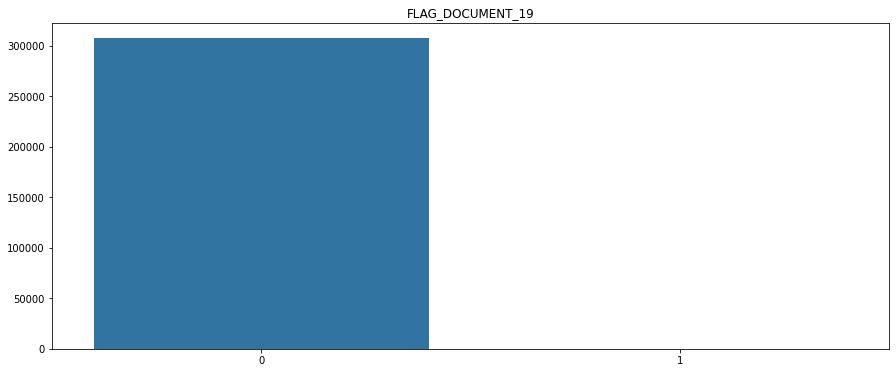

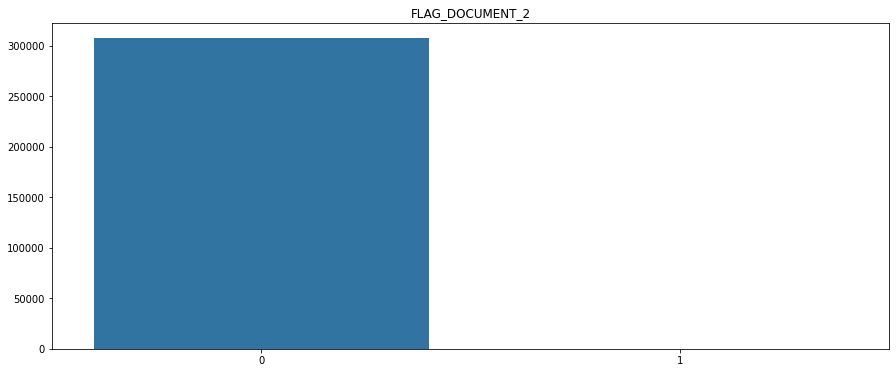

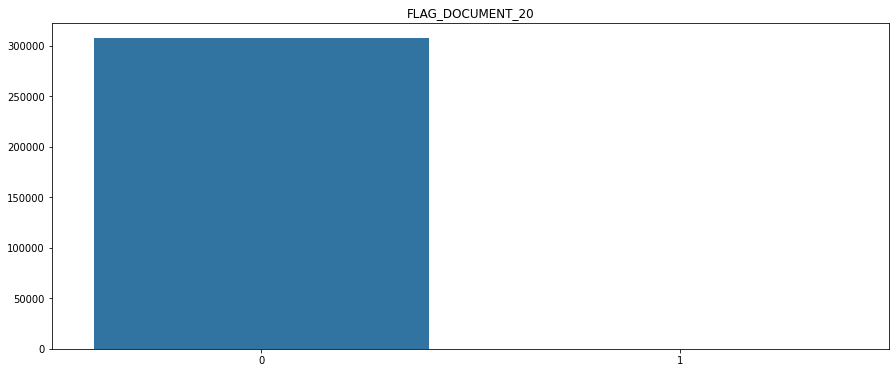

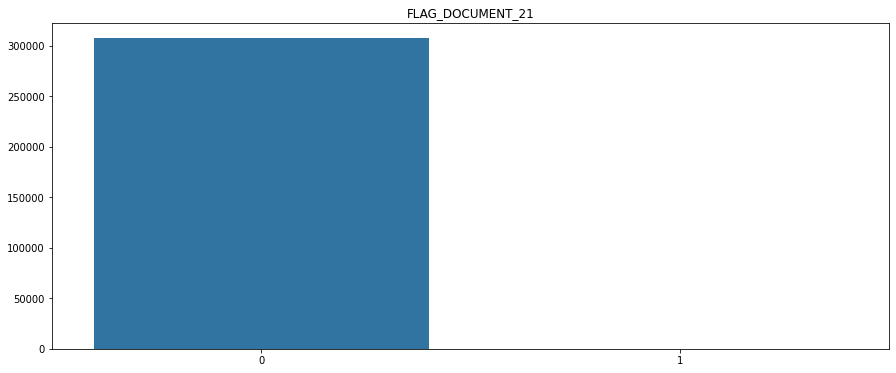

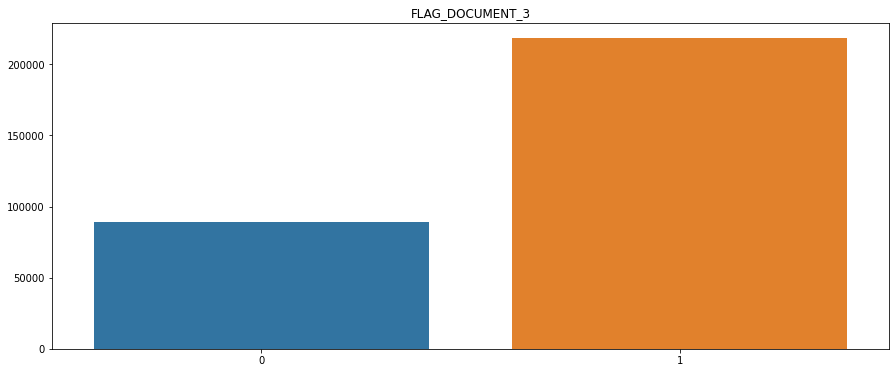

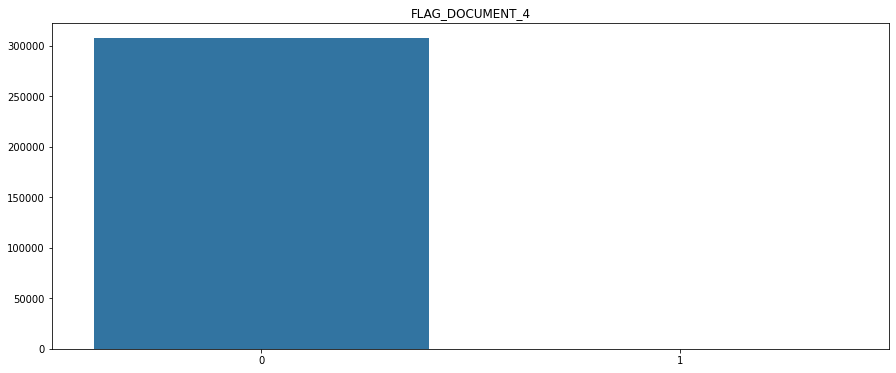

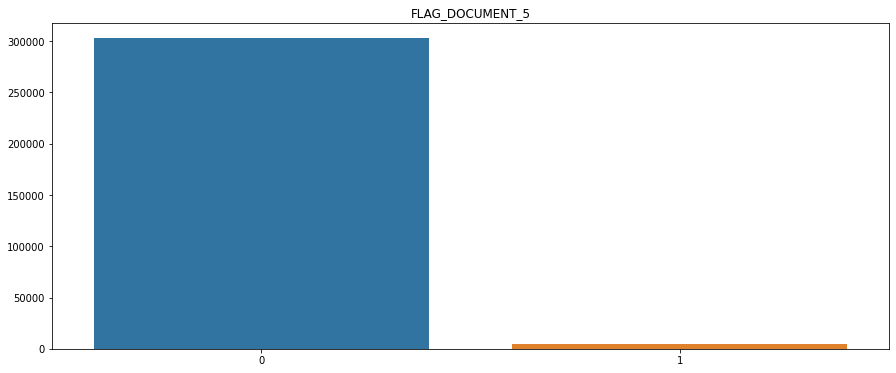

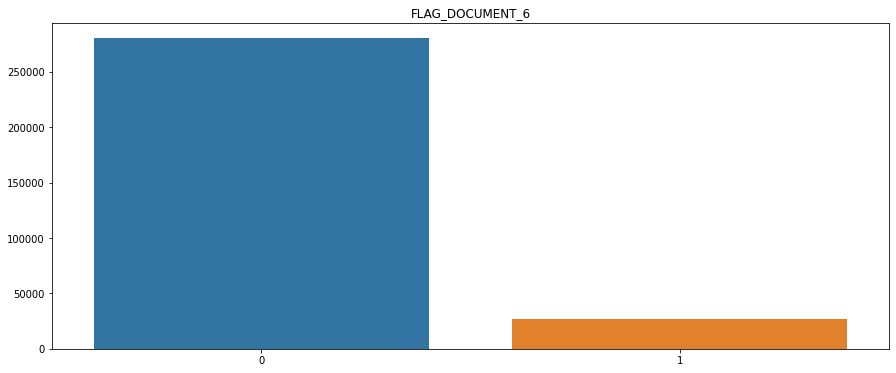

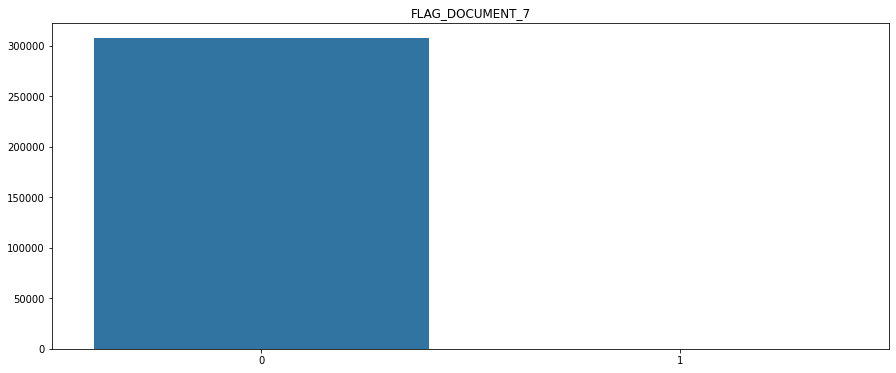

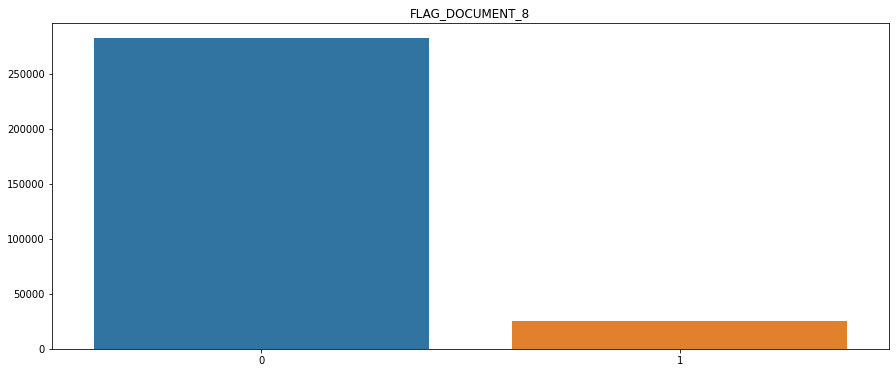

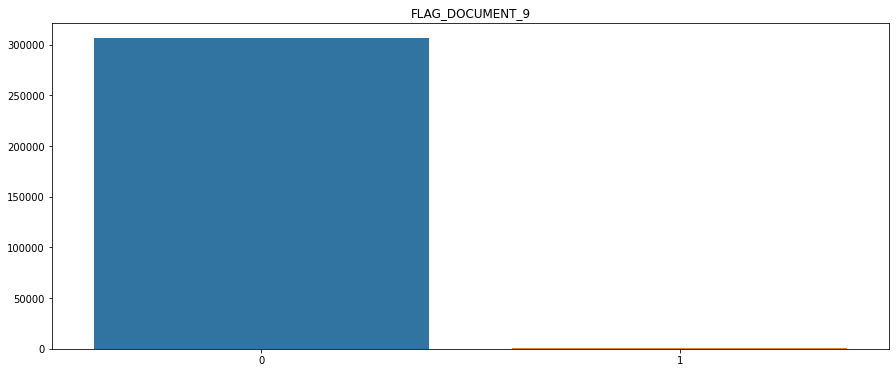

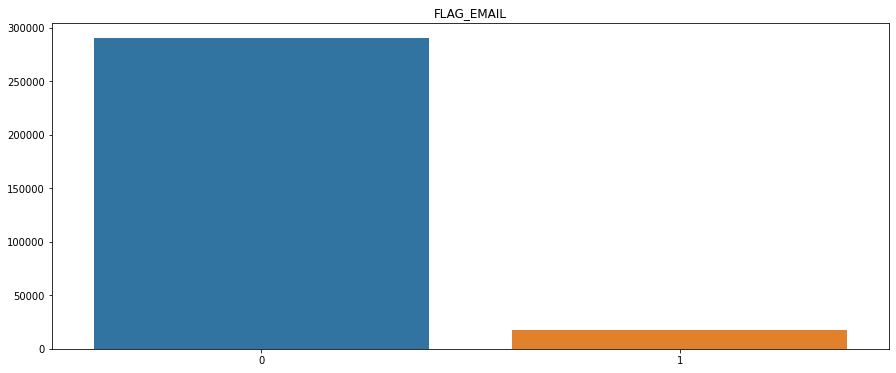

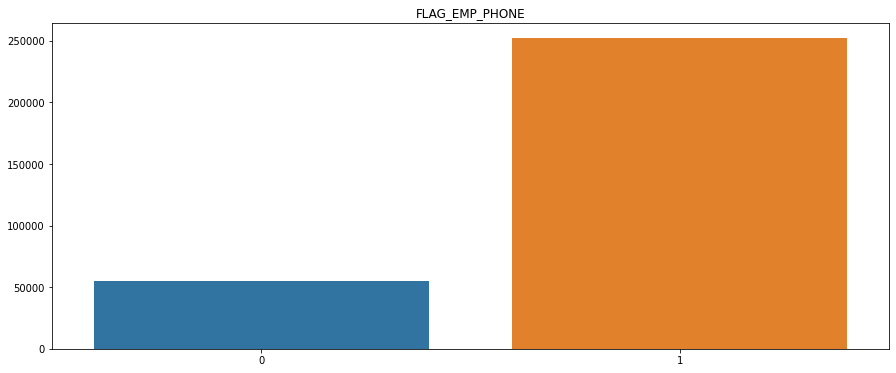

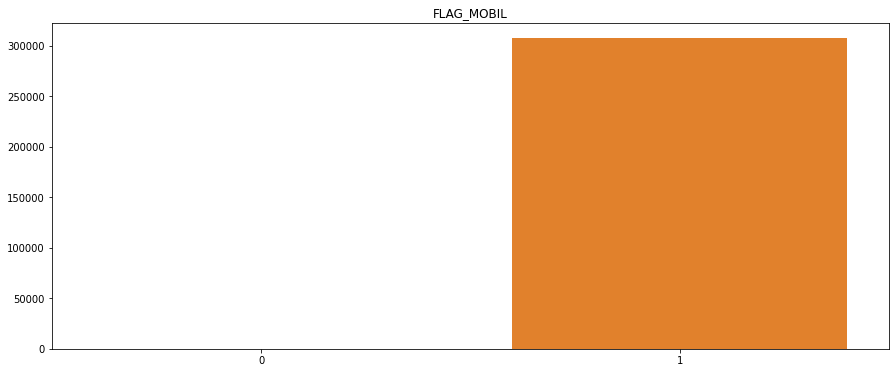

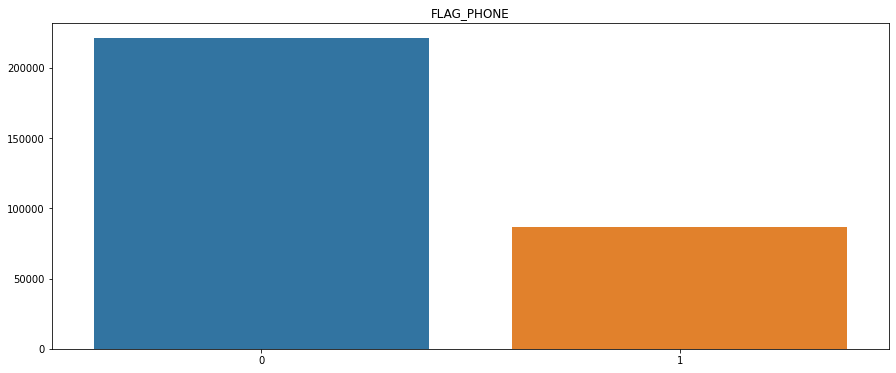

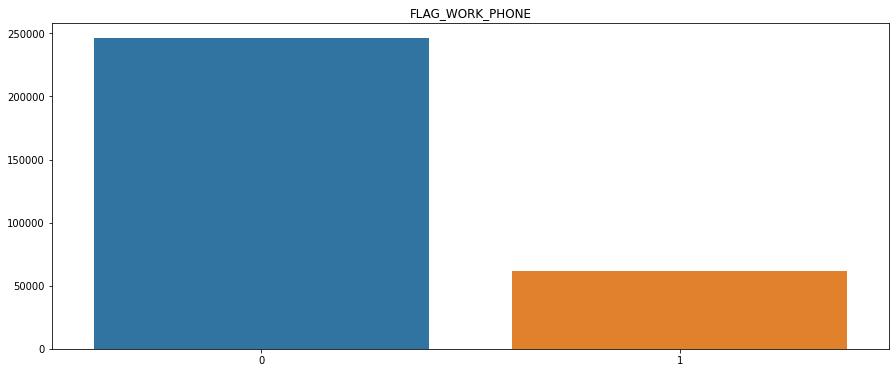

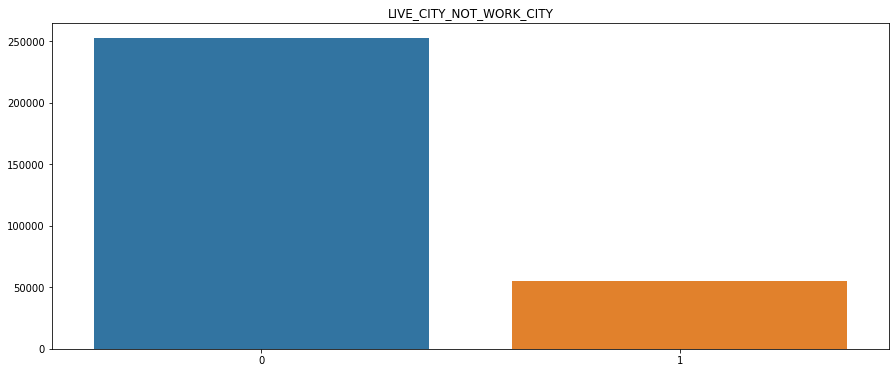

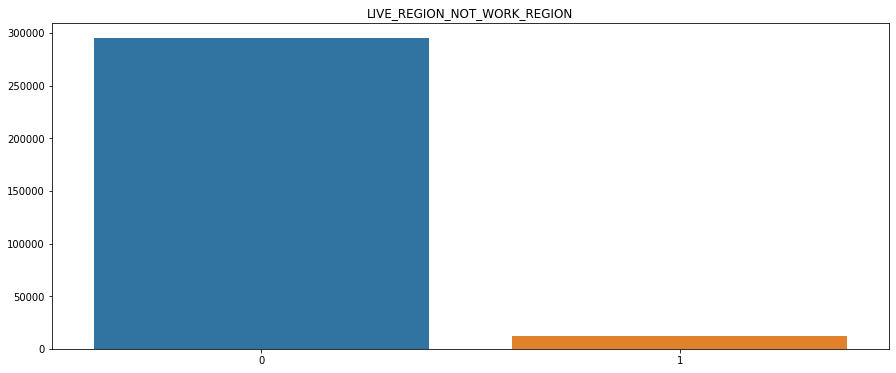

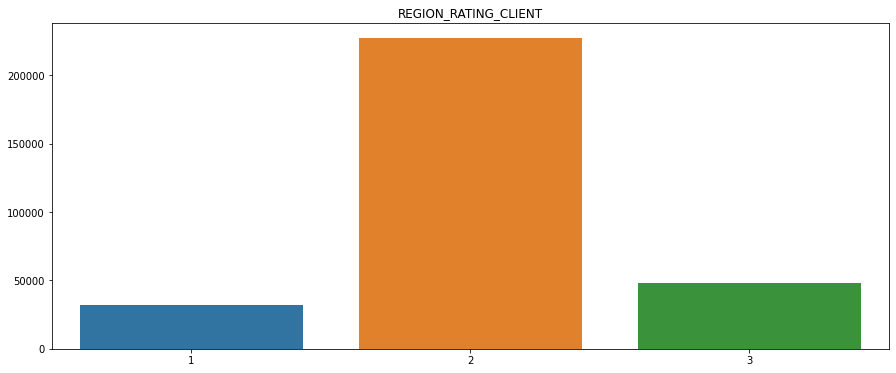

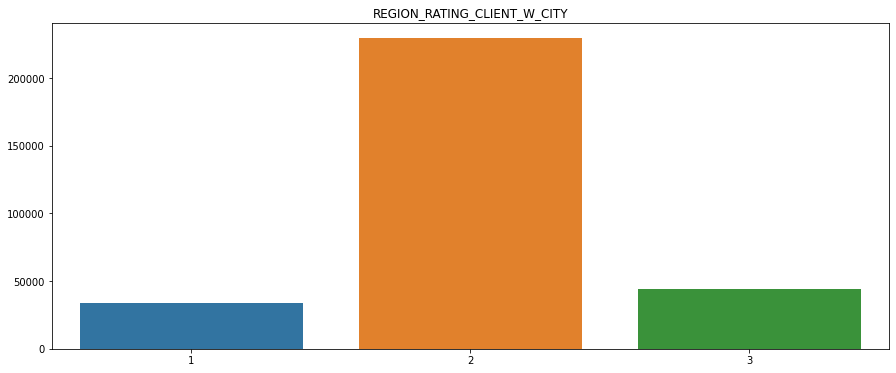

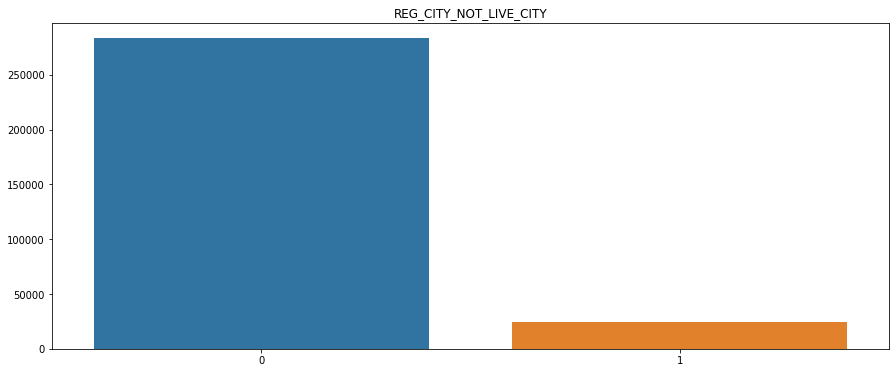

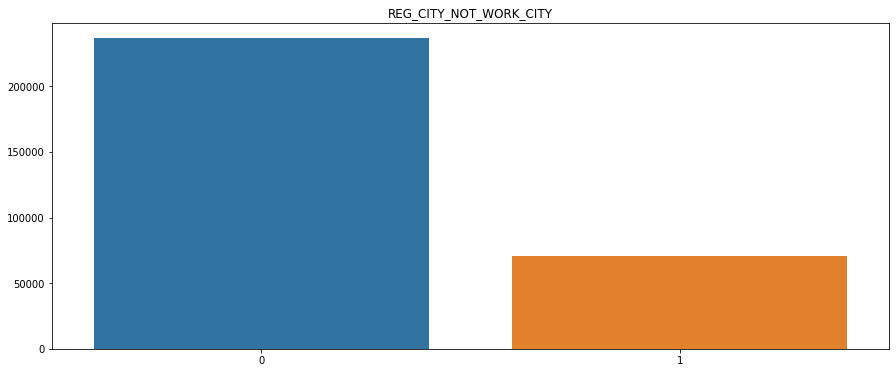

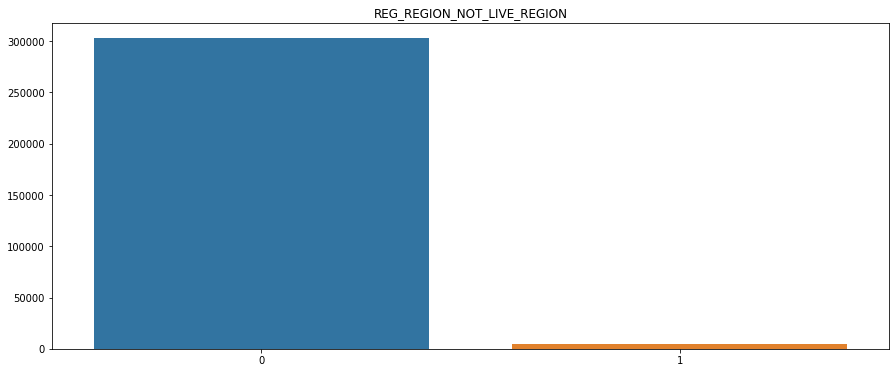

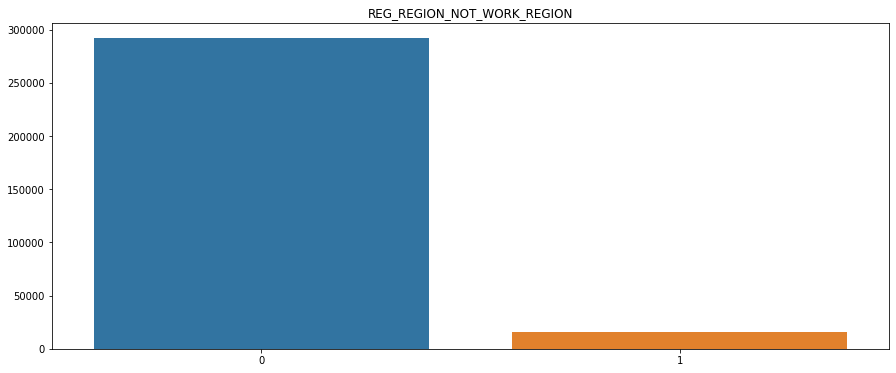

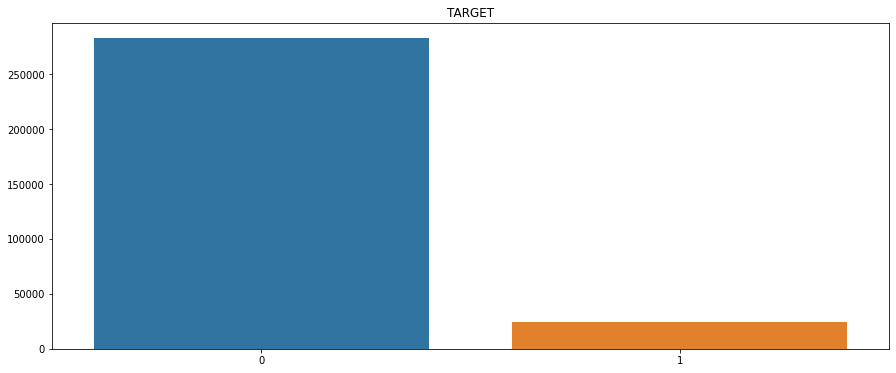

In [259]:
for col in sorted(list(discrete_variables)):
    x_angle = 0
    if data_train[col].nunique() > 10:
        x_angle = 65
    plot_categorical_discrete(data_train, col, title=col, x_angle=x_angle)

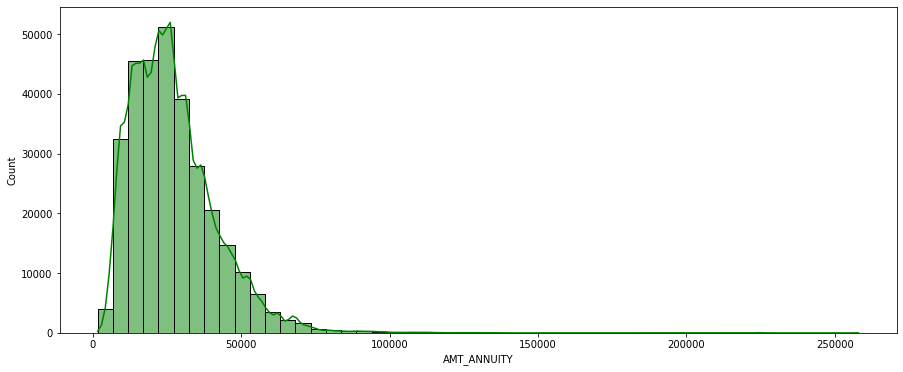

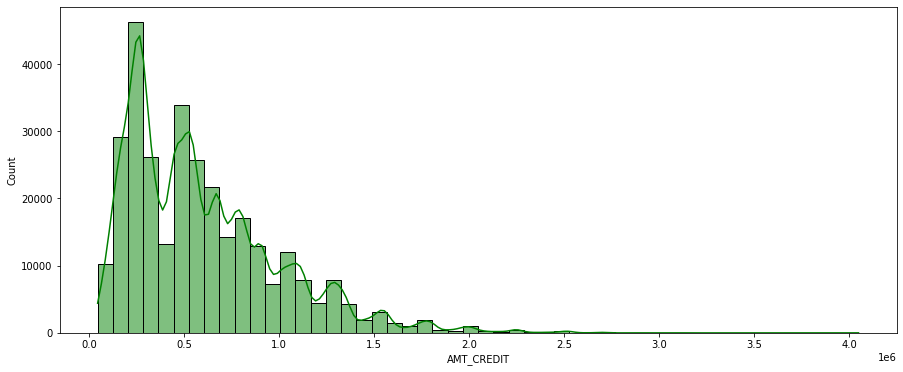

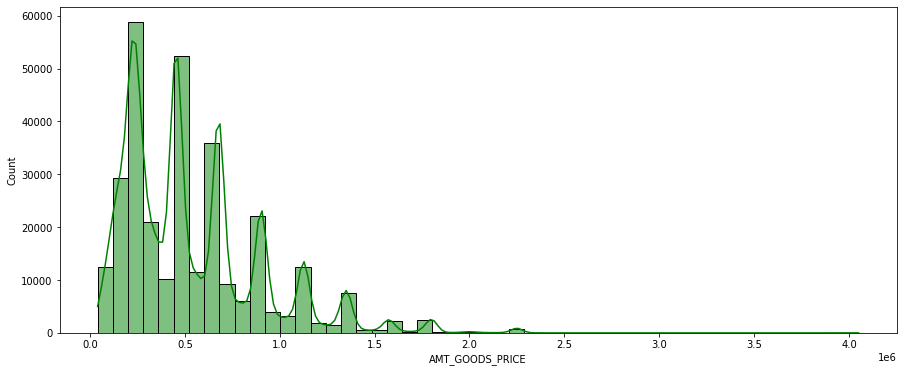

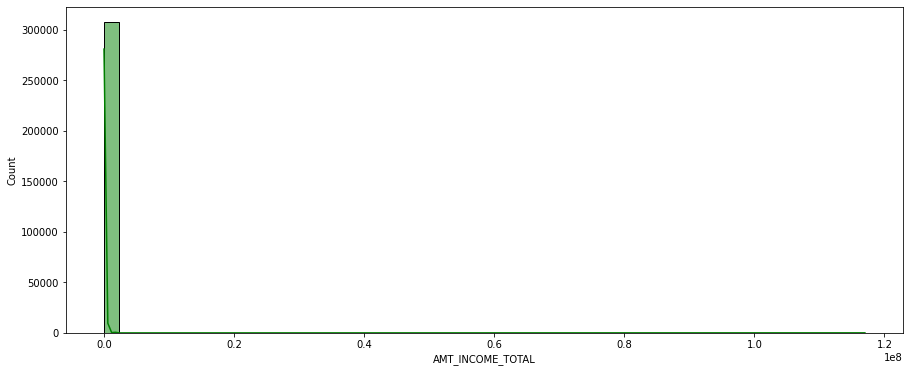

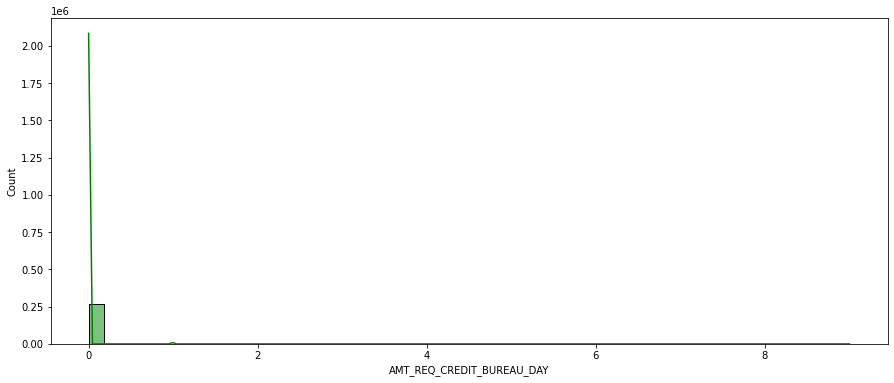

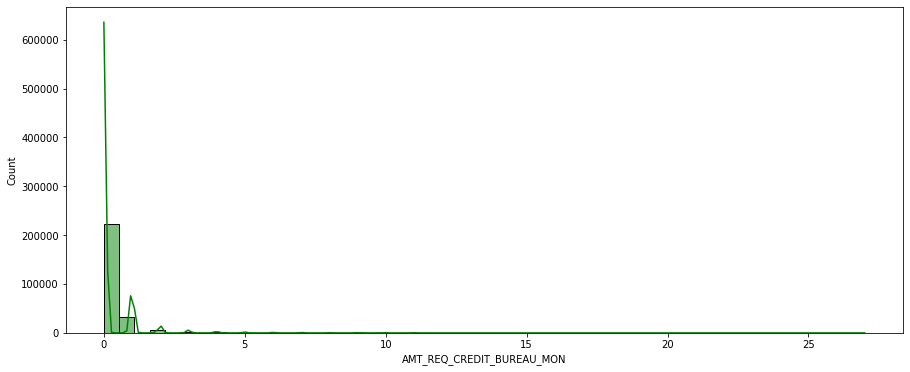

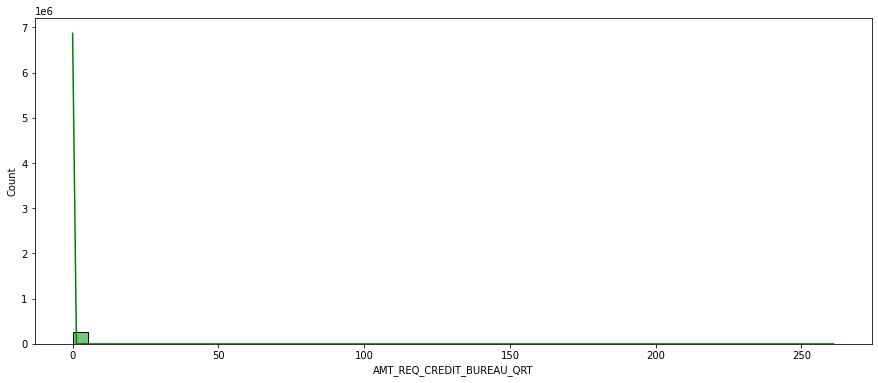

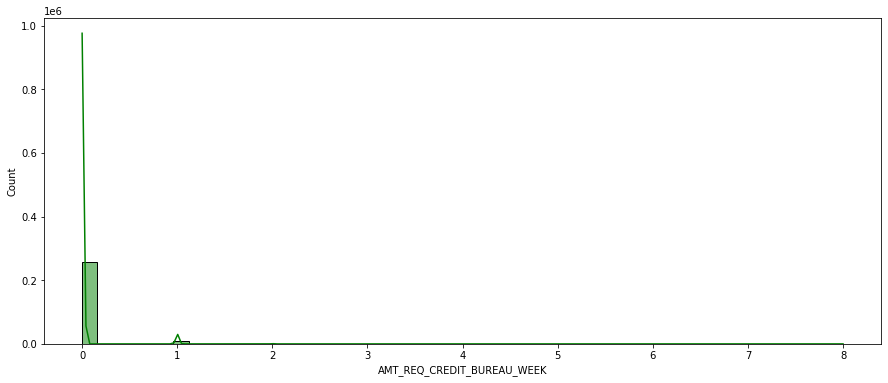

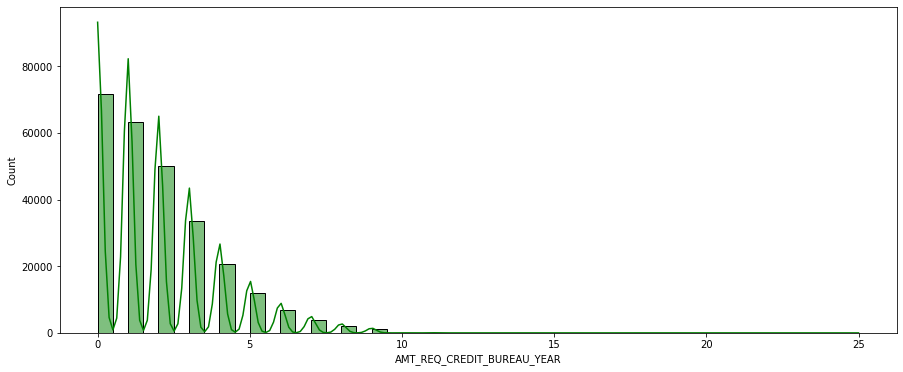

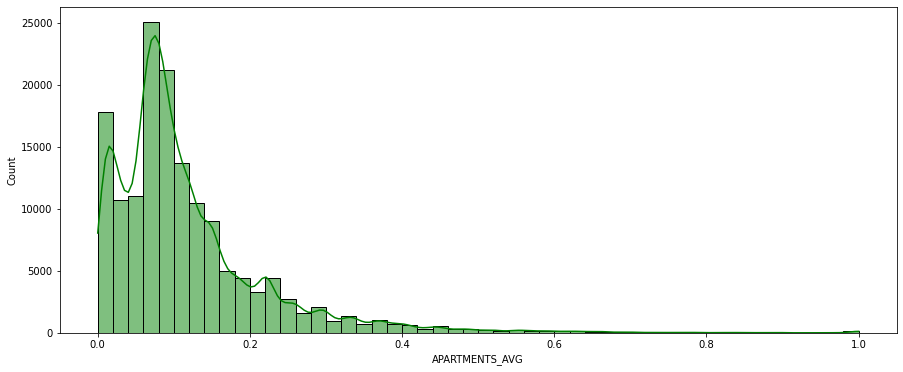

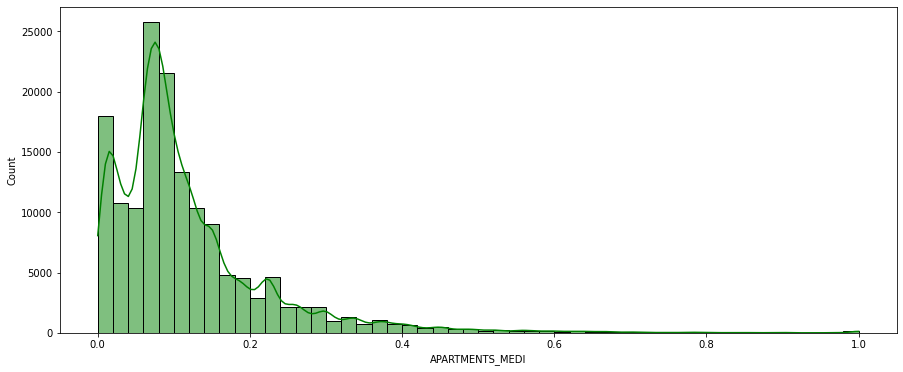

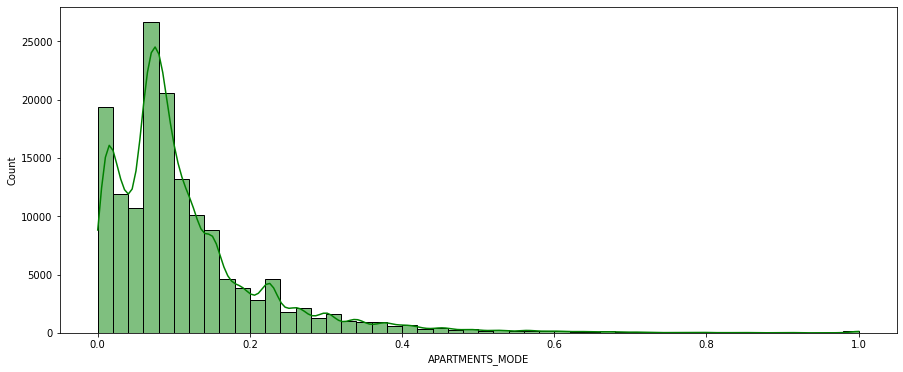

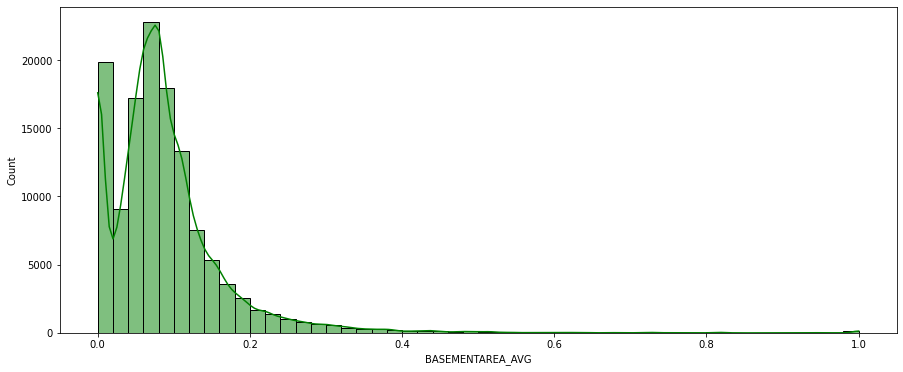

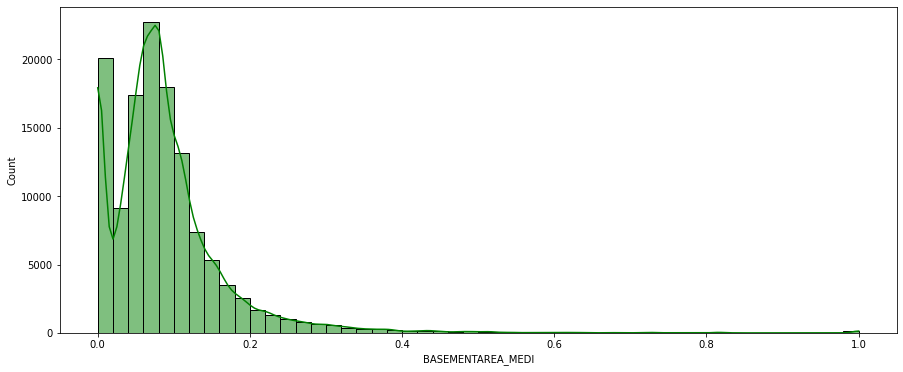

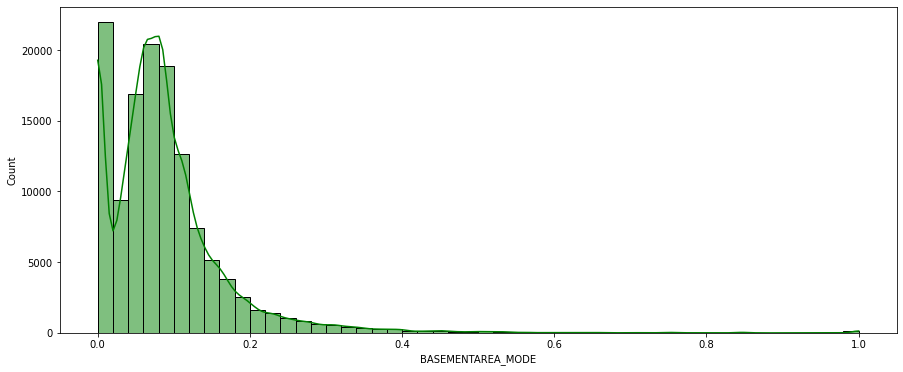

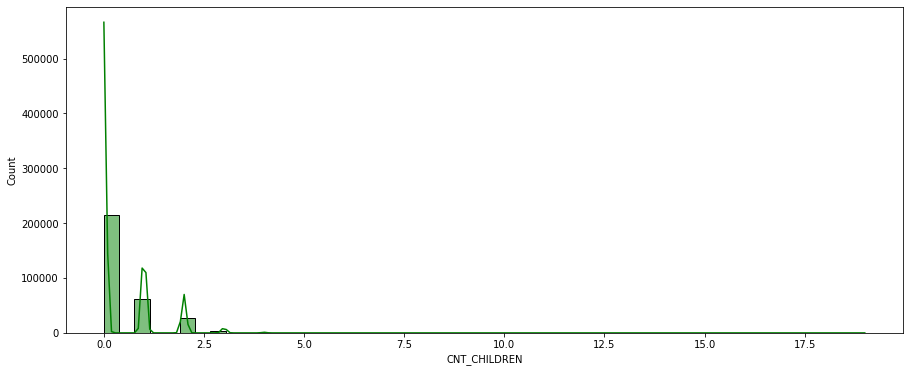

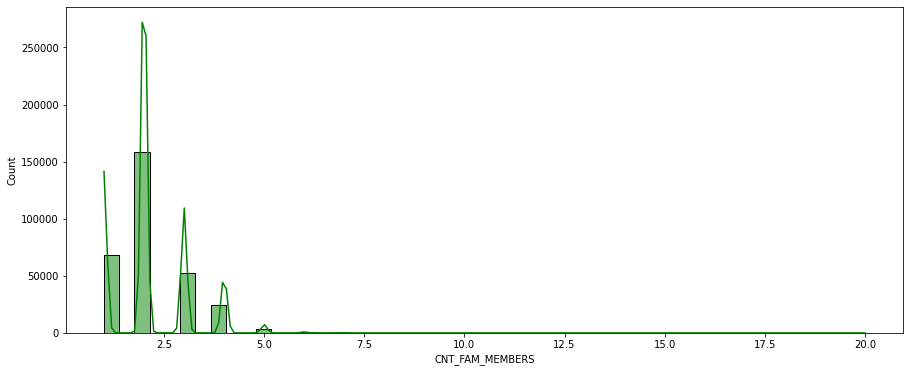

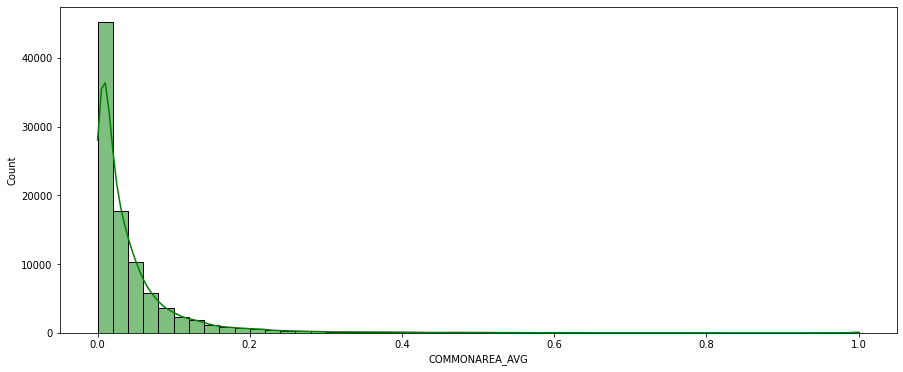

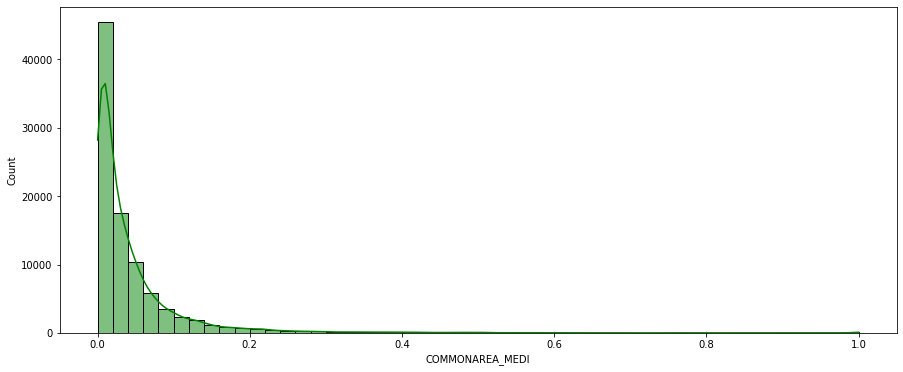

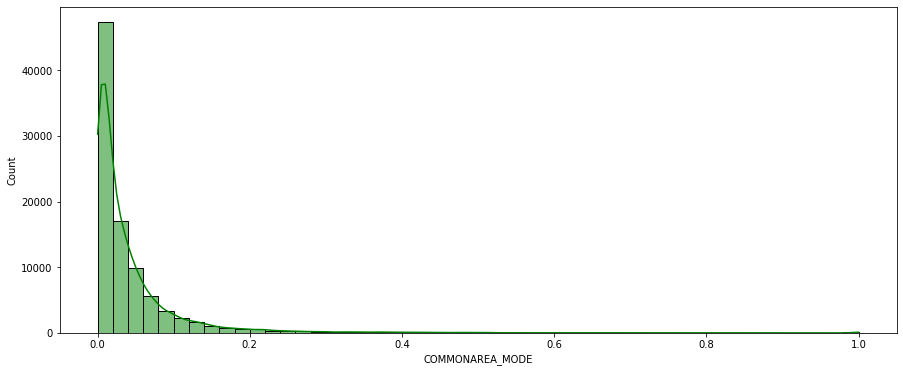

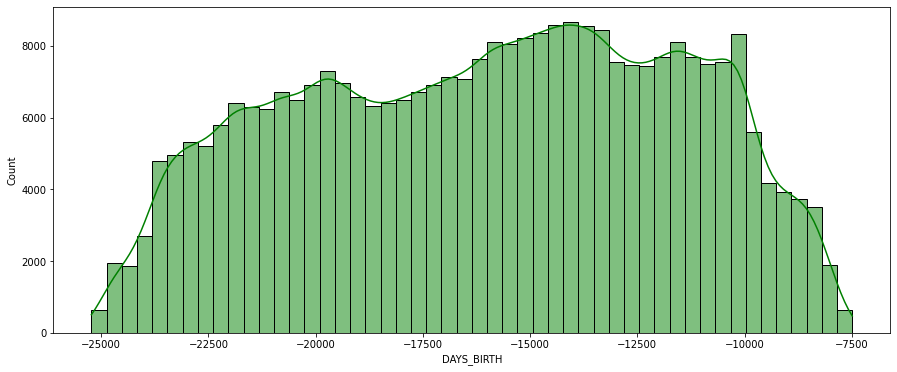

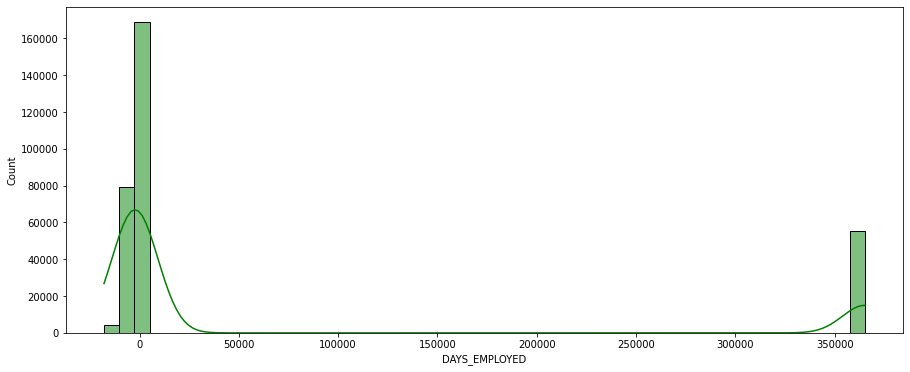

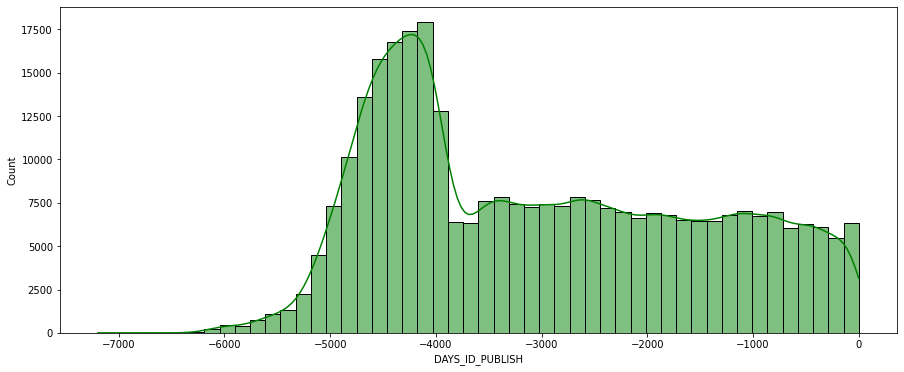

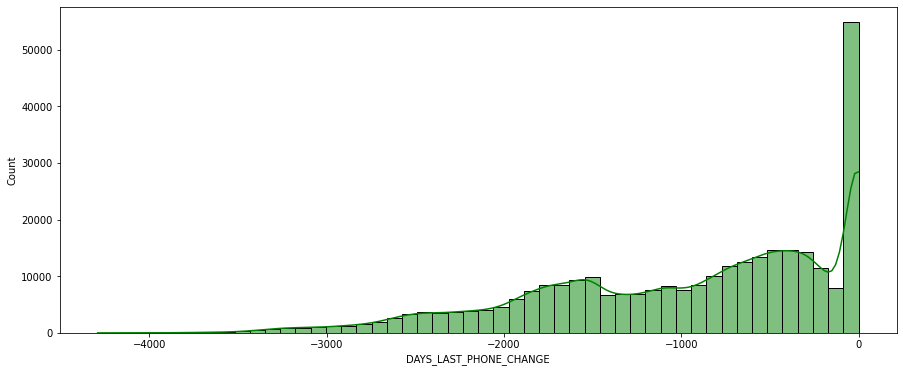

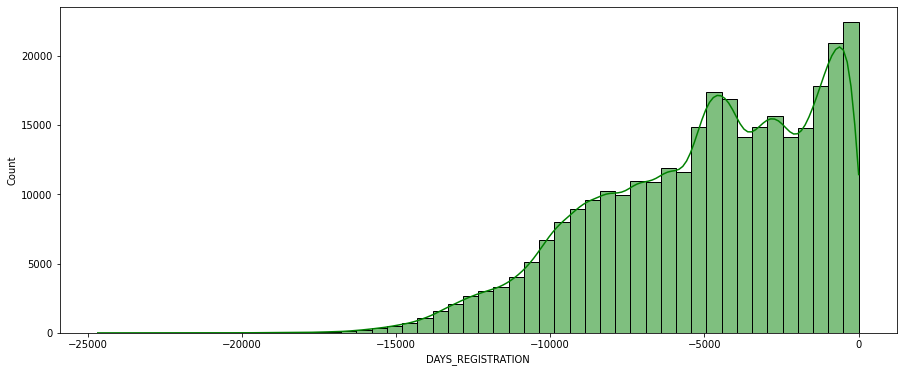

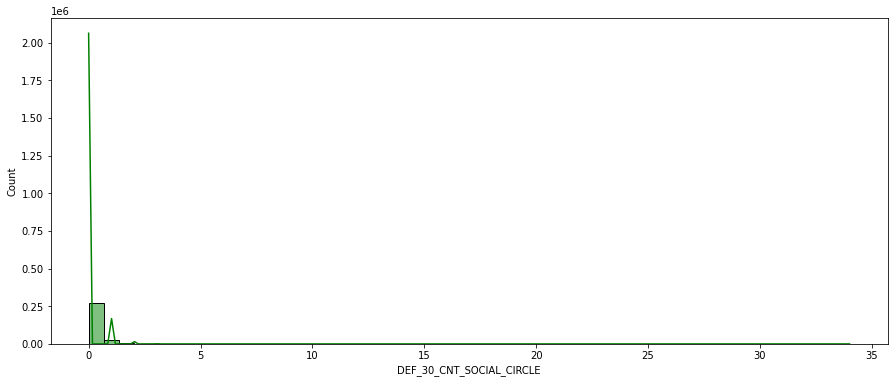

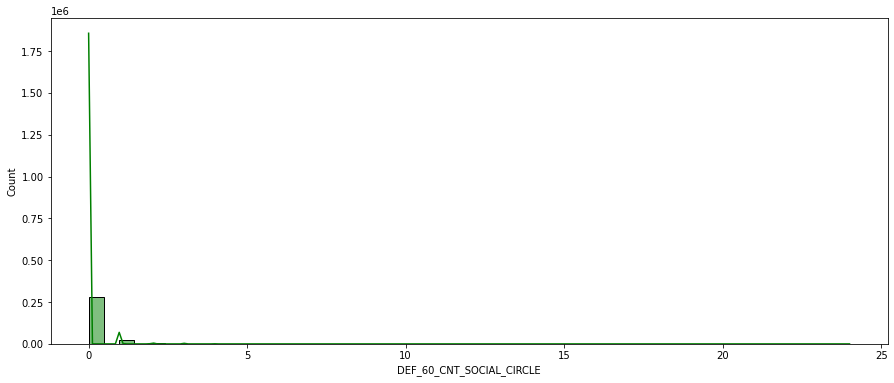

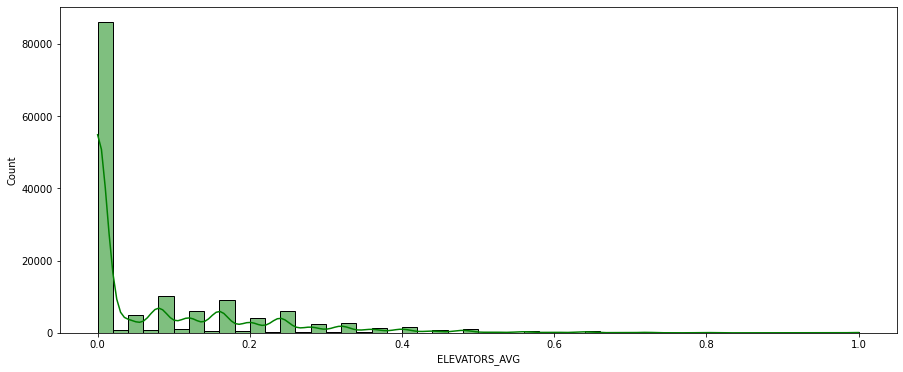

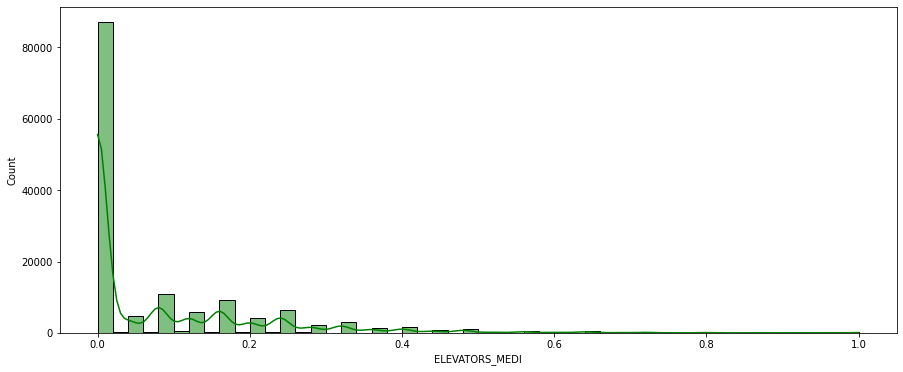

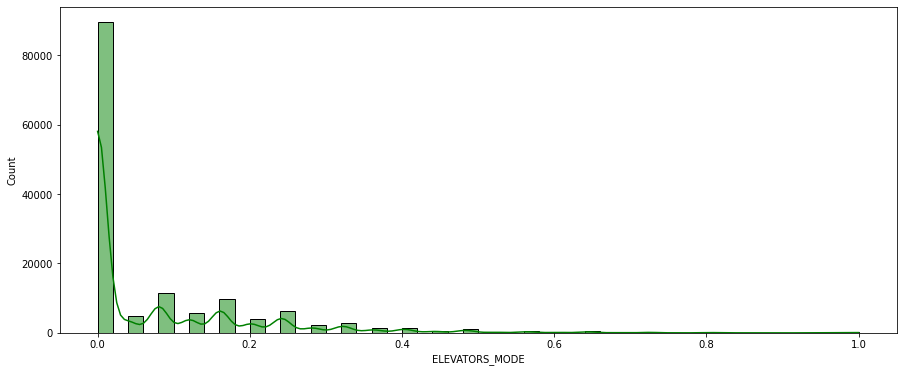

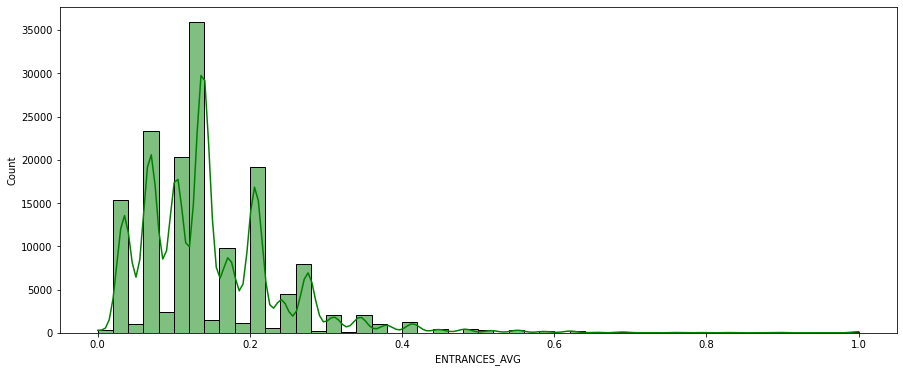

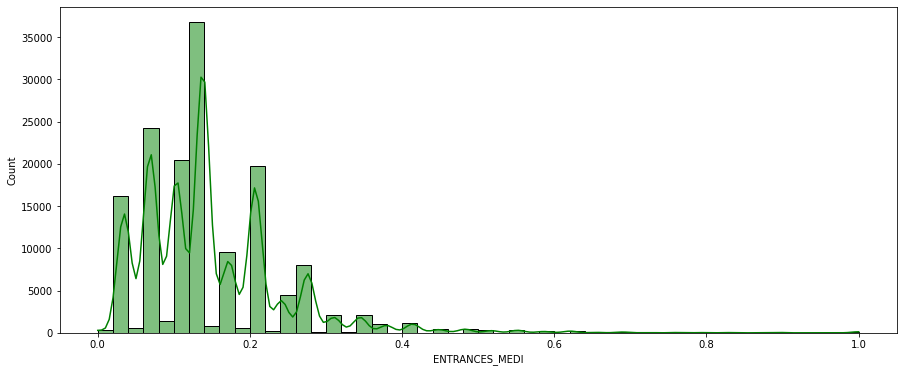

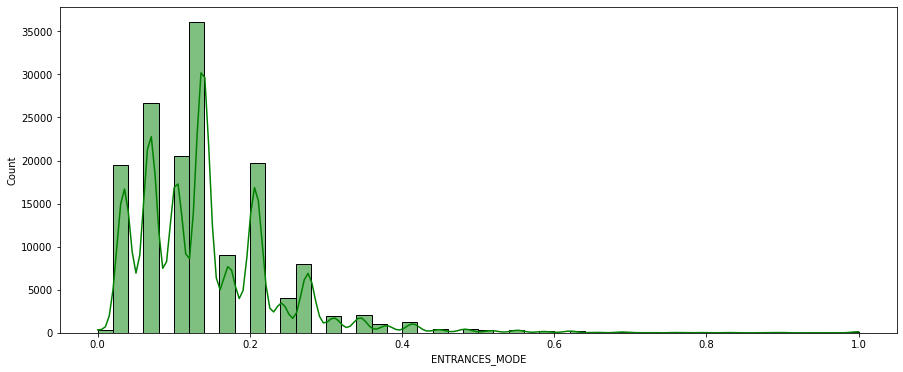

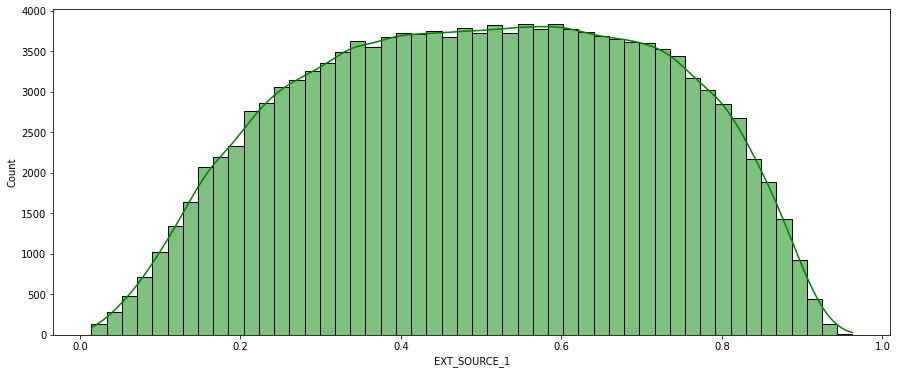

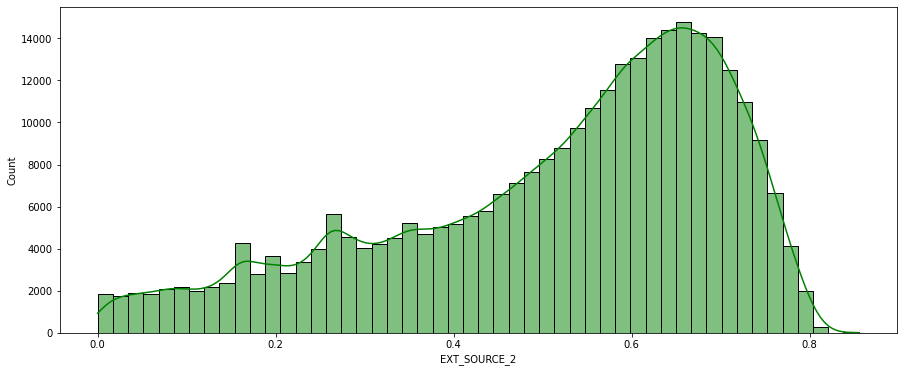

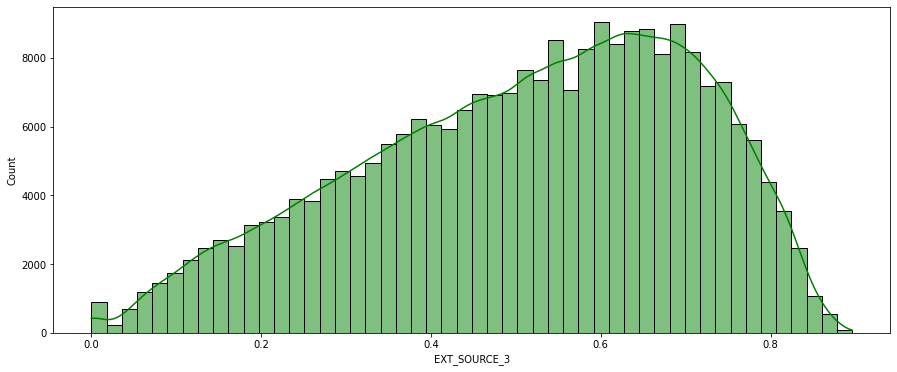

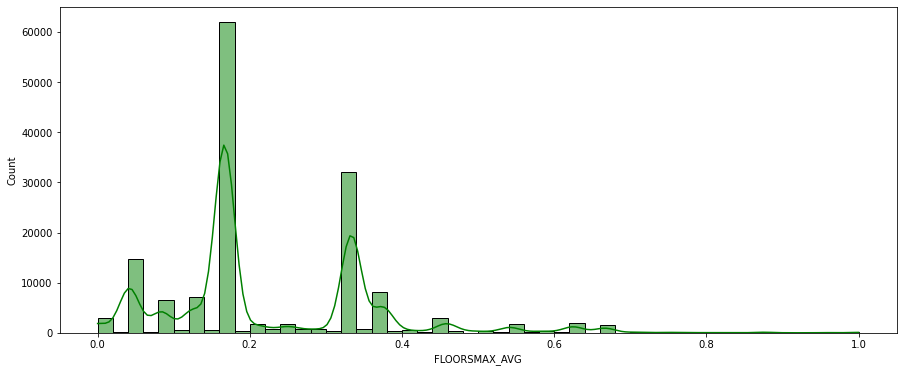

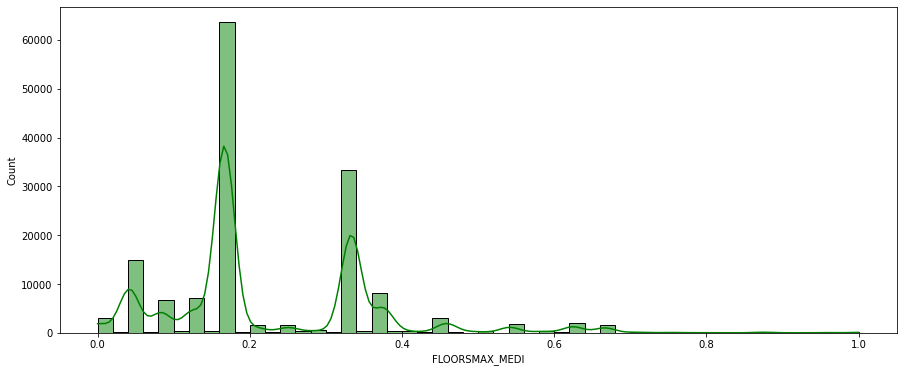

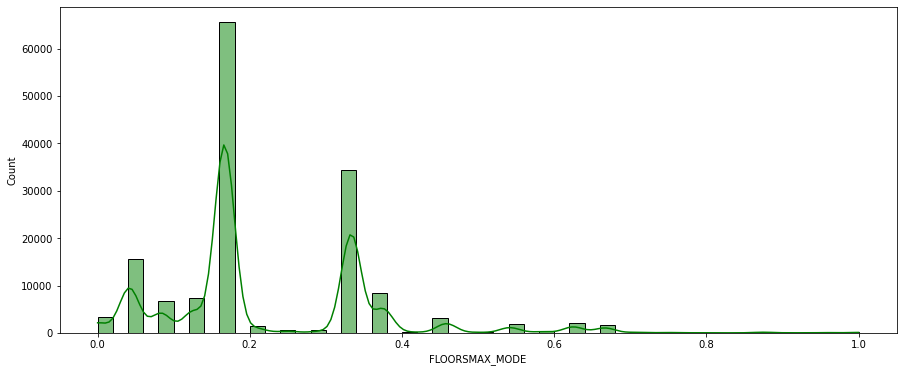

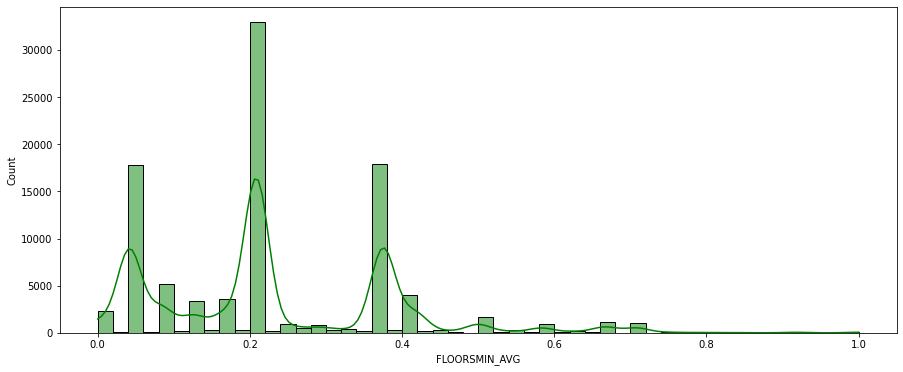

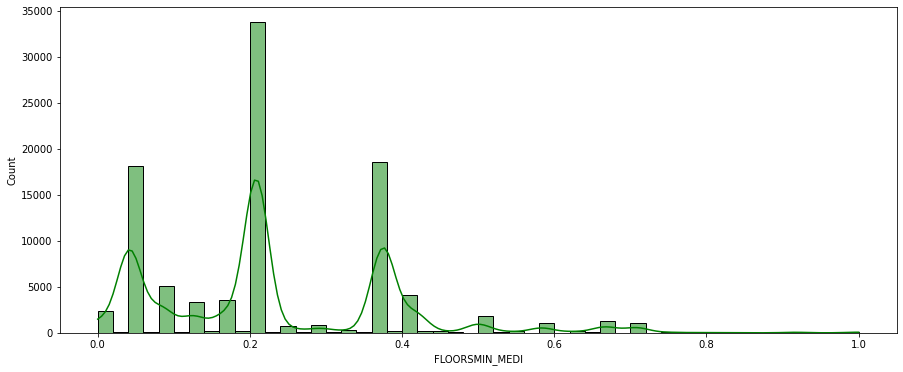

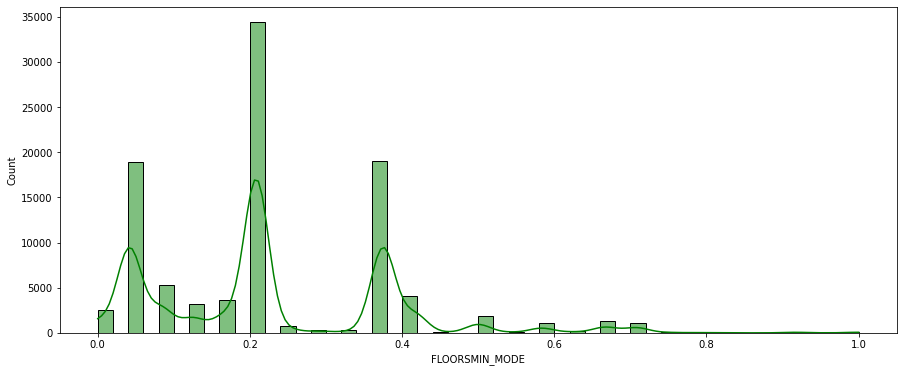

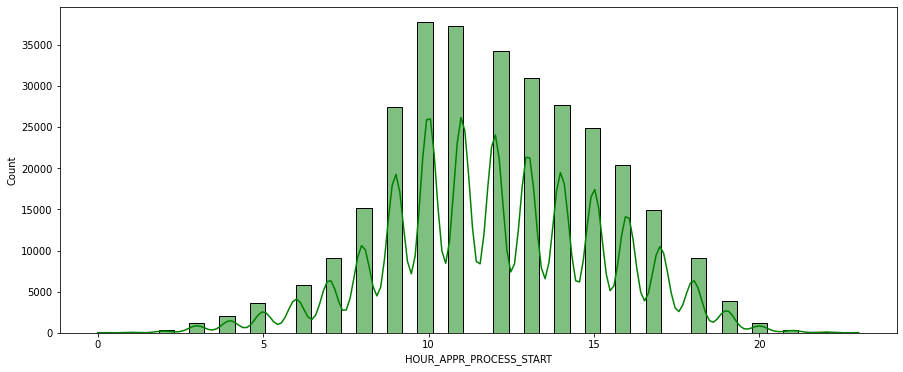

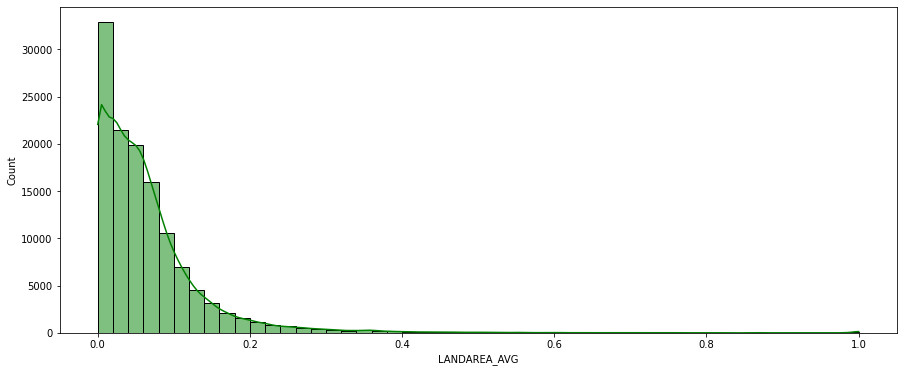

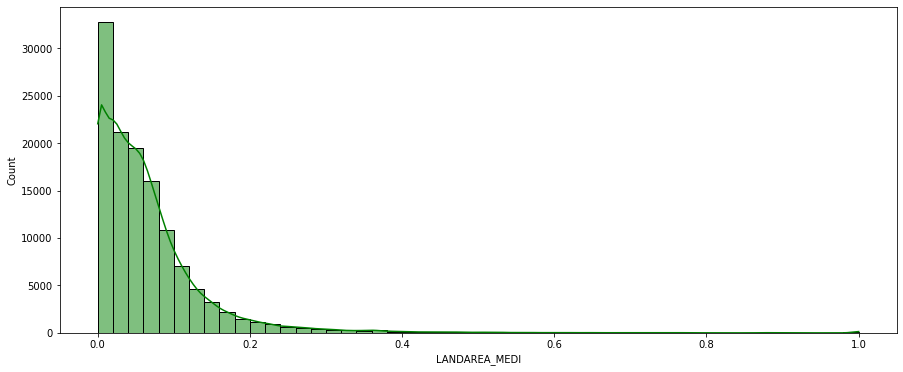

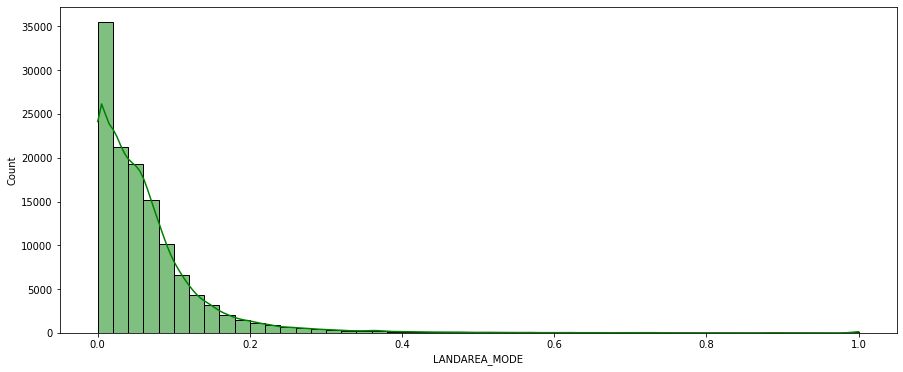

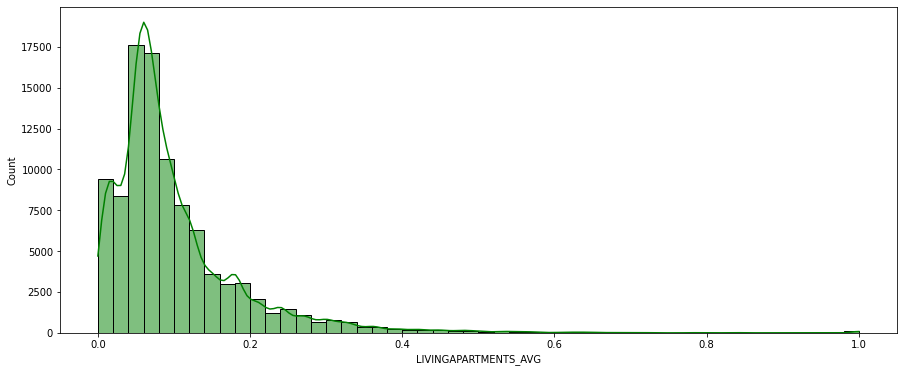

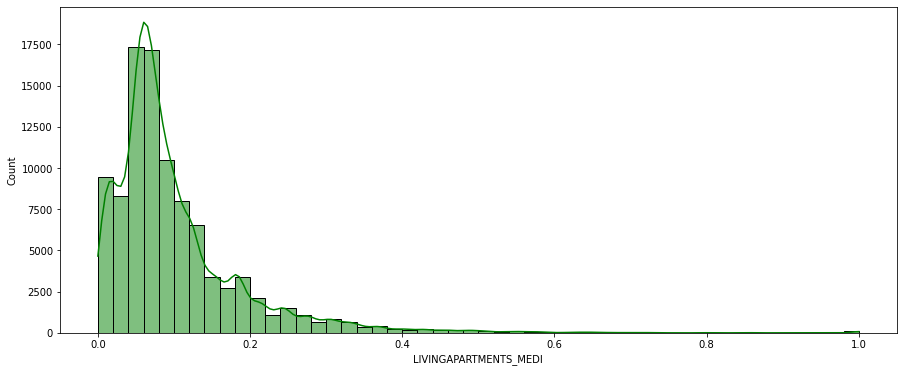

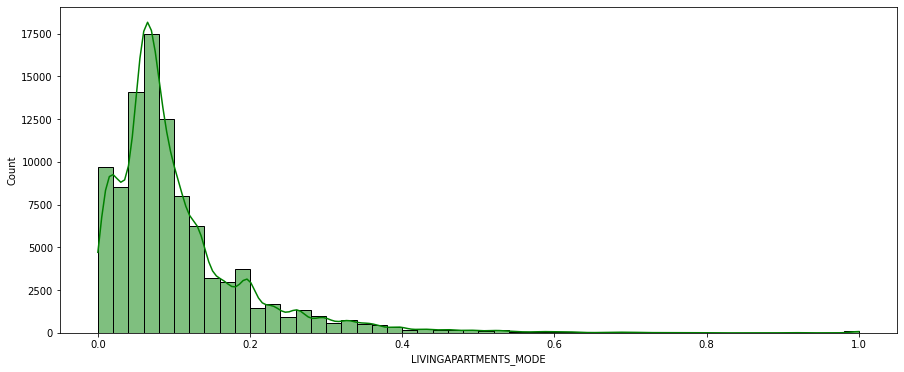

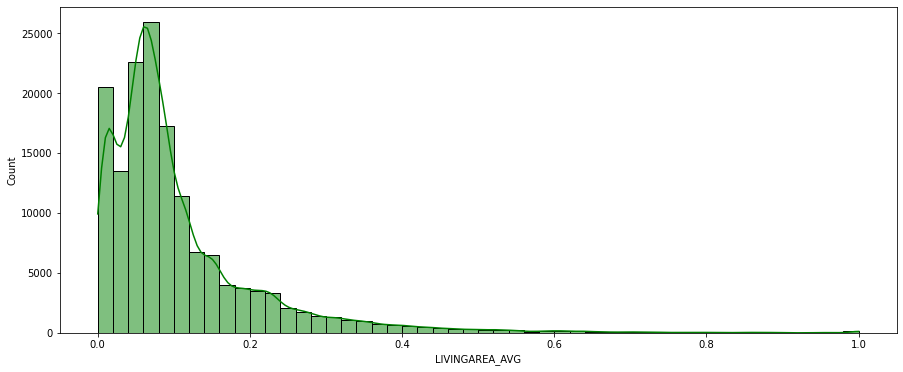

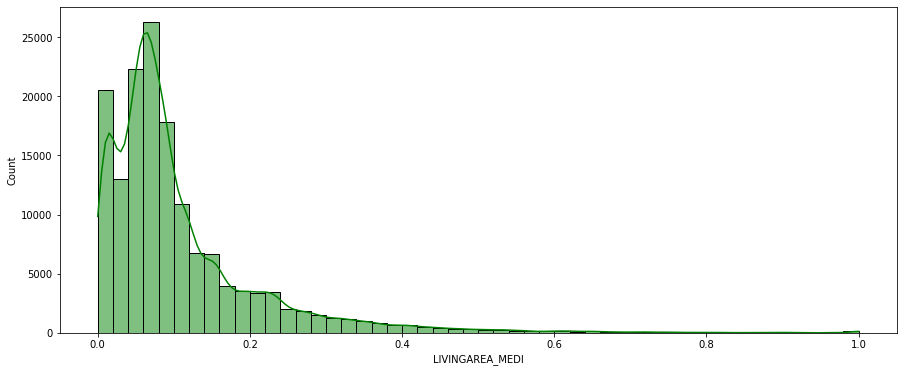

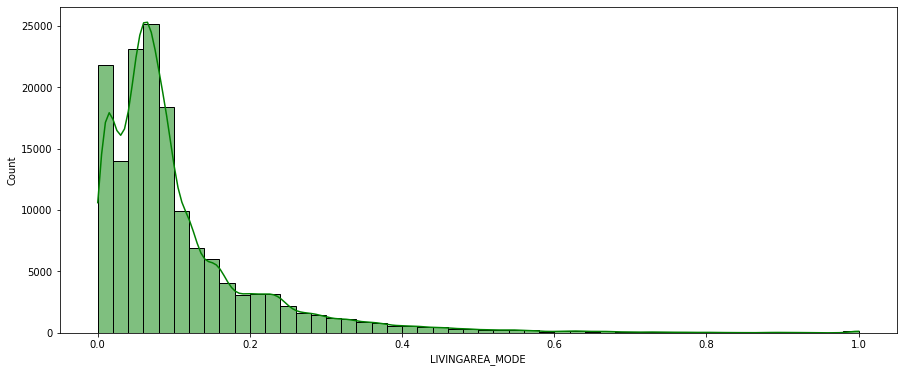

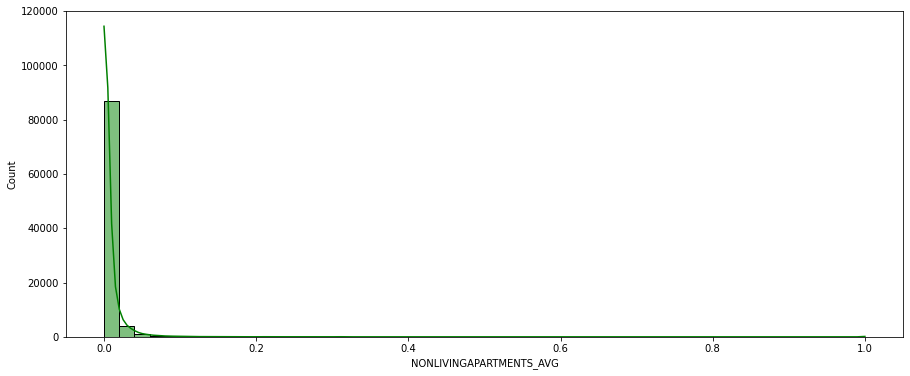

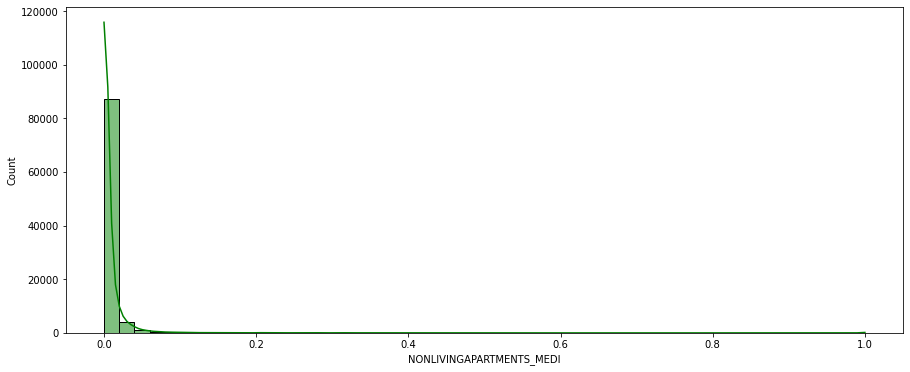

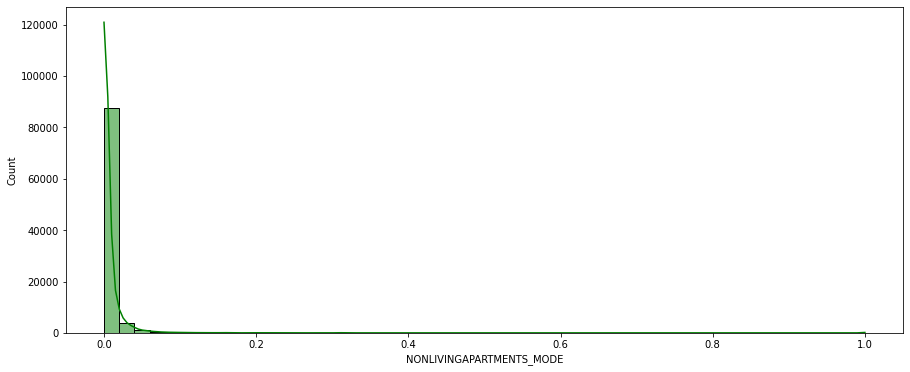

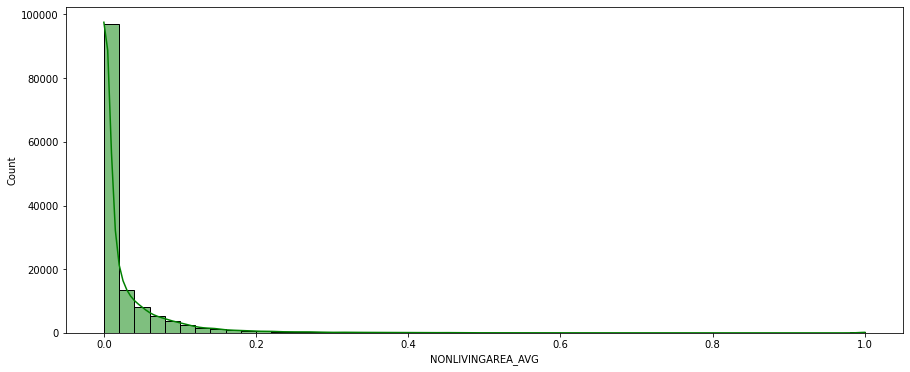

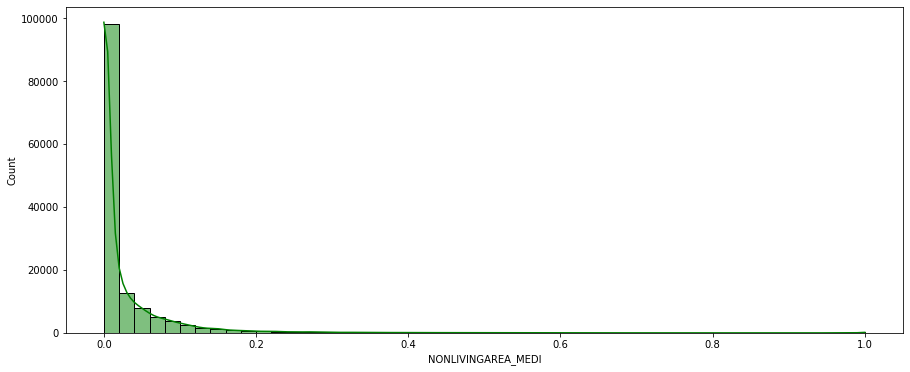

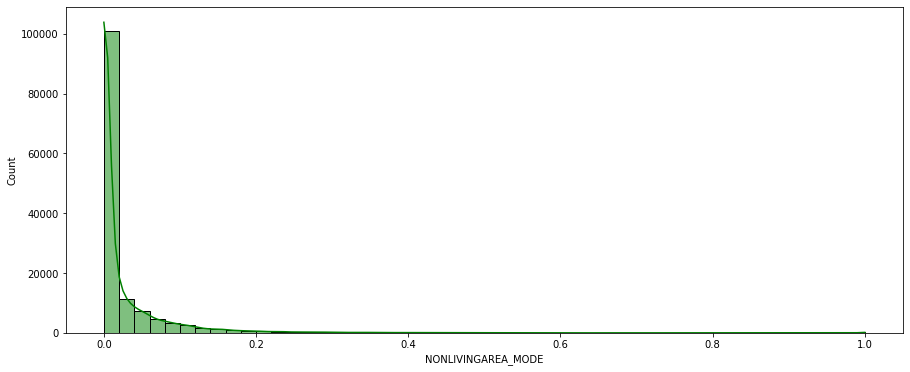

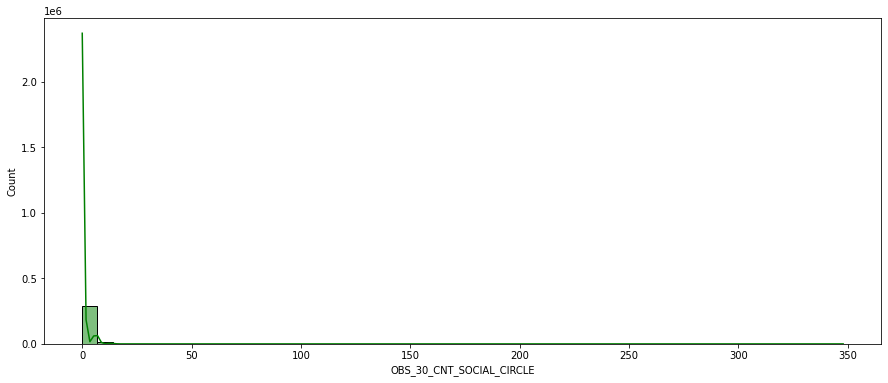

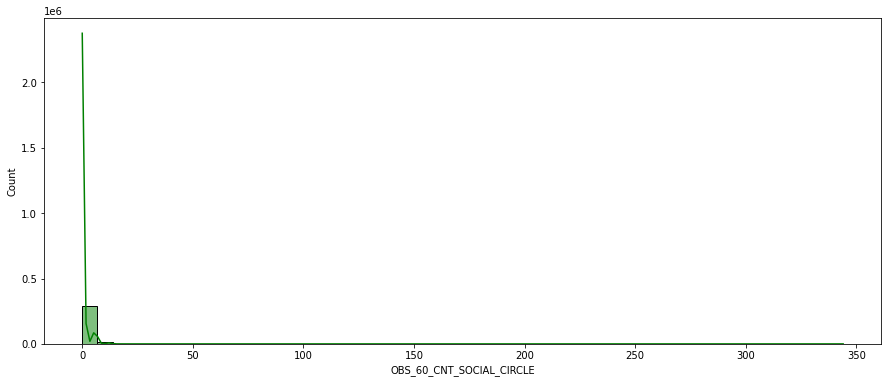

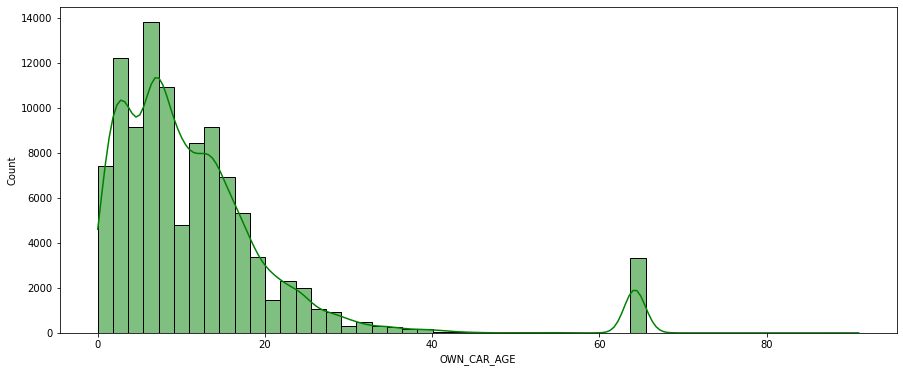

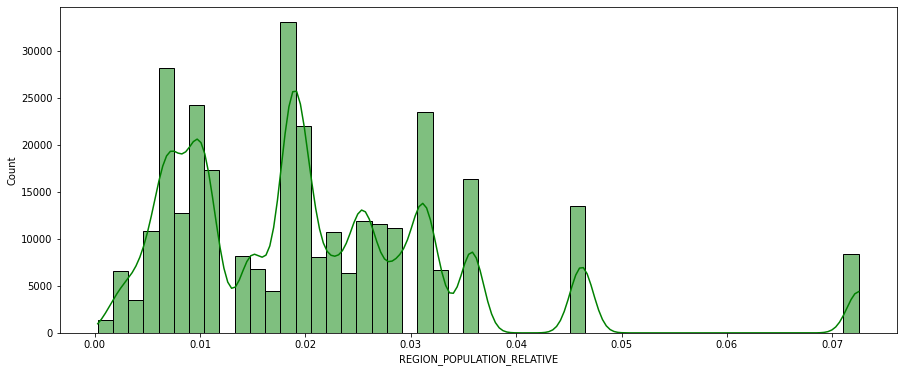

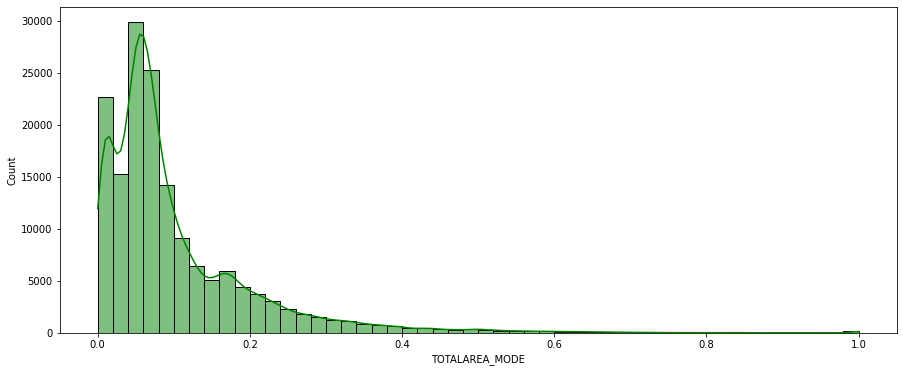

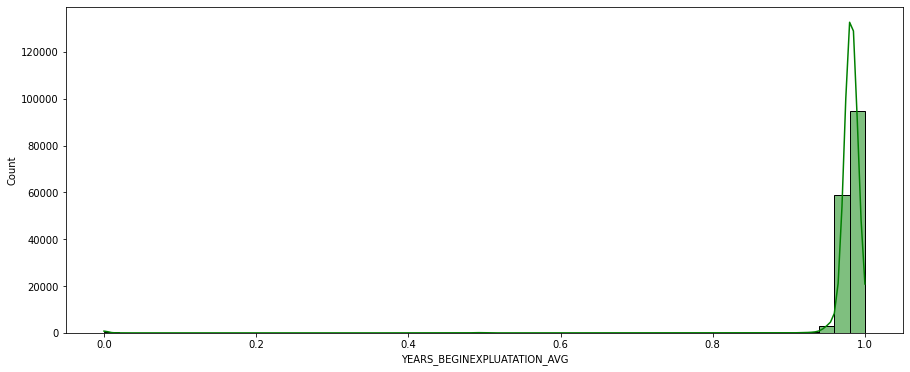

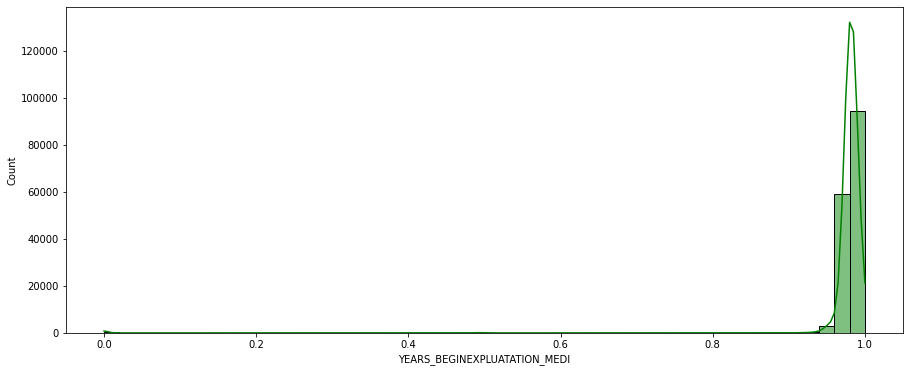

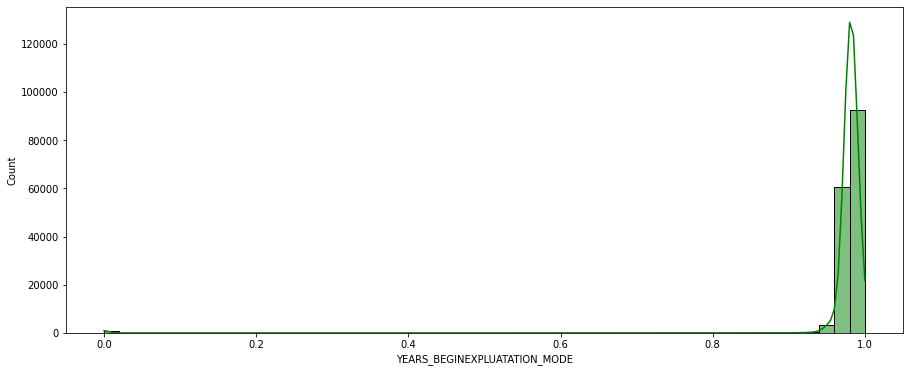

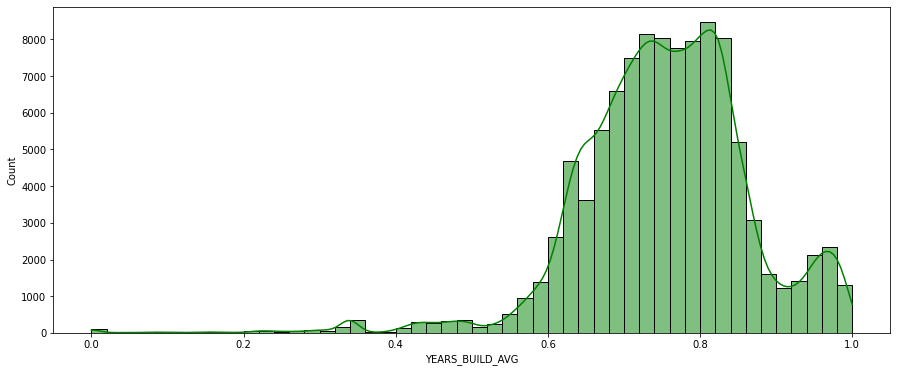

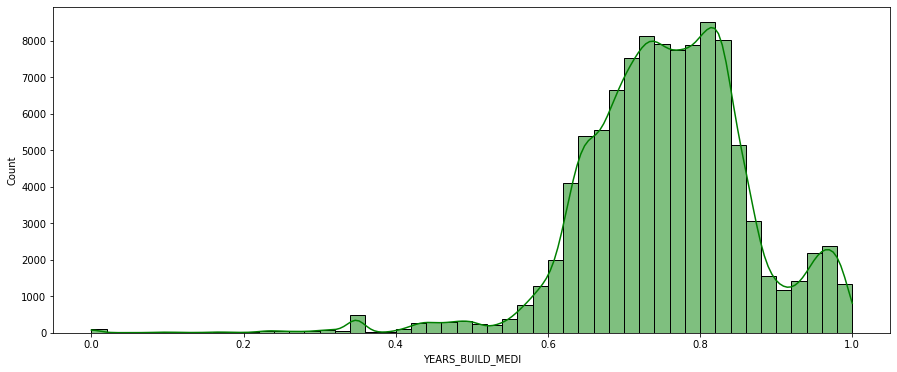

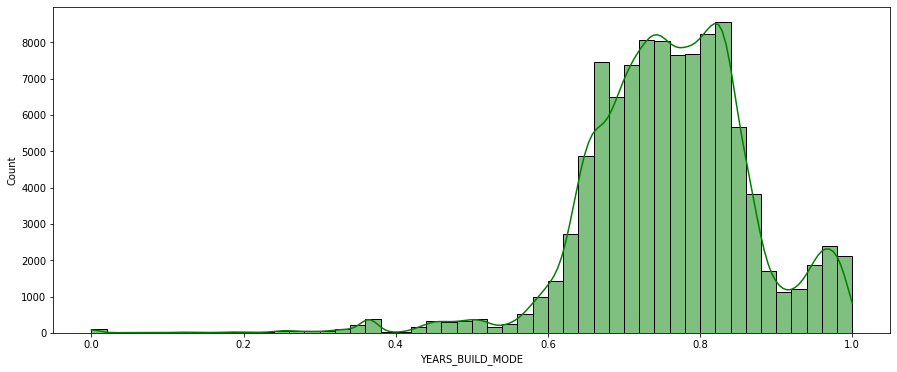

In [210]:
def plot_continuous(data, col, type_='hist', title=''):
    plt.figure(figsize=[15, 6])
    plt.title(title)
    if type_ == 'hist':
        sns.histplot(data[col].dropna(), bins=50, kde=True, color="g")
    elif type_ == 'box':
        sns.boxplot(data[col].dropna())
    plt.show()
    
for variable in sorted(list(continuous_variables)):
    plot_continuous(data_train, variable)

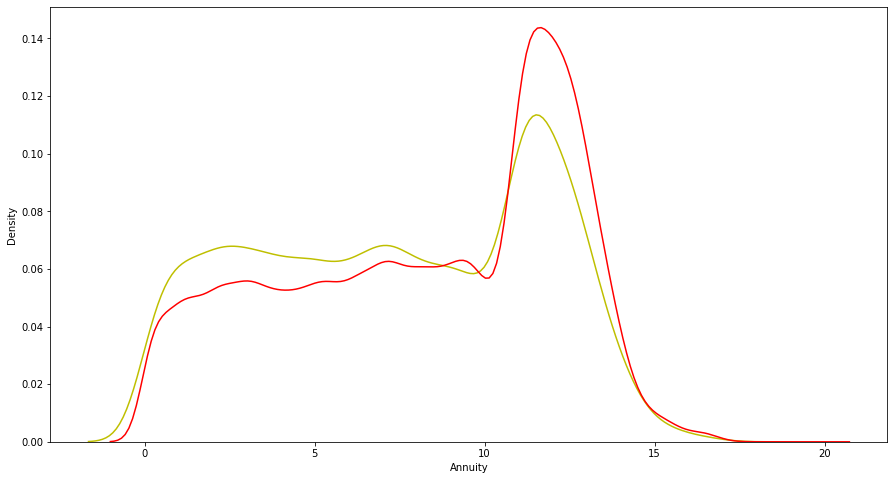

In [260]:
plt.figure(figsize = (15, 8))

sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_ID_PUBLISH'] / -365, color='y', label = '123')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_ID_PUBLISH'] / -365, color='r', label = '234')

plt.xlabel('Annuity')
plt.show()

This plot can be summarized:
People who changed their identity document from 0 to 10 years ago tend to more likely pay loan back.
Those who changed it from 10 to 15 years ago are more likely to avoid payment.

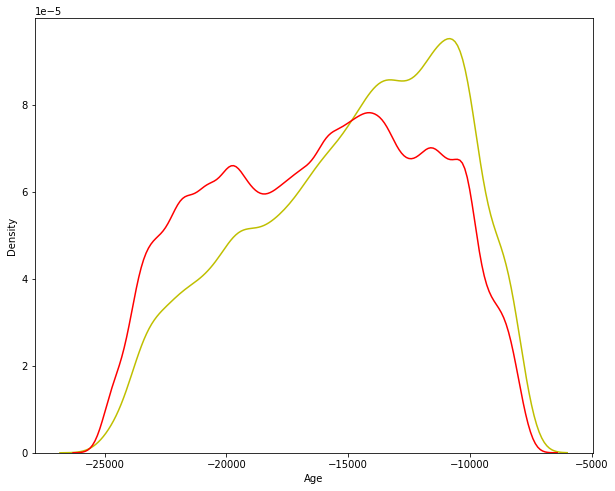

In [261]:
plt.figure(figsize = (10, 8))

sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'], color='y', label = '123')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'], color='r', label = '234')

plt.xlabel('Age')
plt.show()

This plot can be summarized:
People aged from 25 to 30 have the lowest probability to pay the loan back
People aged from 35 to 45 have the highest probability to pay the loan back
Starting at the age of 40 the number of people paying back grows higher than number of those who don't.

# EDA FINISHED

- Target class is imbalanced
- Most of the loans are cash loans
- There is a trend where the more the client's age is, the more the probability of client paying back
- There is a trend of dependance on identity document's update age
- Almost all clients who provide mobile phone and the phone numbers are reachable, unlike emails
- Clients registered address are mostly in the same city where they live, but not where they work
- Two-third of clients don't have their own car, but two-third of them have their own home
- Some annomalities in AMT_INCOME_TOTAL and DAYS_EMPLOYED

In [262]:
# Removing annomalities in AMT_INCOME_TOTAL and DAYS_EMPLOYED

data_train['AMT_INCOME_TOTAL'] = data_train['AMT_INCOME_TOTAL'].apply(lambda x: np.nan if x > 100000000 else x)
data_train['DAYS_EMPLOYED'] = data_train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)

In [263]:
# Encoding categorical variables

for name in categorical_variables:
    encoder = LabelEncoder()
    encoder.fit(list(data_train[name].values.astype('str')) + list(data_test[name].values.astype('str')))
    data_test[name] = encoder.transform(data_test[name].values.astype('str'))
    data_train[name] = encoder.transform(data_train[name].values.astype('str'))

In [264]:
# Replacing NaN with mean values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

cols = data_train.columns
test_cols = data_test.columns
data_train[cols] = imputer.fit_transform(data_train)
data_test[test_cols] = imputer.fit_transform(data_test)

In [265]:
# Regularization

X = data_train.drop('TARGET', axis=1)
y = data_train['TARGET']
clf = Lasso(alpha=0.005, max_iter=10000)
scaler = StandardScaler()
clf.fit(scaler.fit_transform(X), y)

final_variables = []
for i in range(len(list(X))):
    if clf.coef_[i]:
        final_variables.append(list(X)[i])

print('There are ', len(final_variables), ' variables that will be used, they are: ', final_variables)

There are  16  variables that will be used, they are:  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3']


In [266]:
variable_importance = pd.DataFrame(data=np.abs(clf.coef_), index=list(X), columns=['Importance'])
variable_importance = variable_importance[variable_importance['Importance'] != 0].sort_values(by='Importance', ascending=False)
variable_importance

,Importance
EXT_SOURCE_3,0.032396
EXT_SOURCE_2,0.032167
EXT_SOURCE_1,0.010607
CODE_GENDER,0.006814
NAME_EDUCATION_TYPE,0.005874
DAYS_EMPLOYED,0.005743
FLAG_DOCUMENT_3,0.004095
FLAG_OWN_CAR,0.001973
DAYS_ID_PUBLISH,0.001765
DEF_30_CNT_SOCIAL_CIRCLE,0.001328


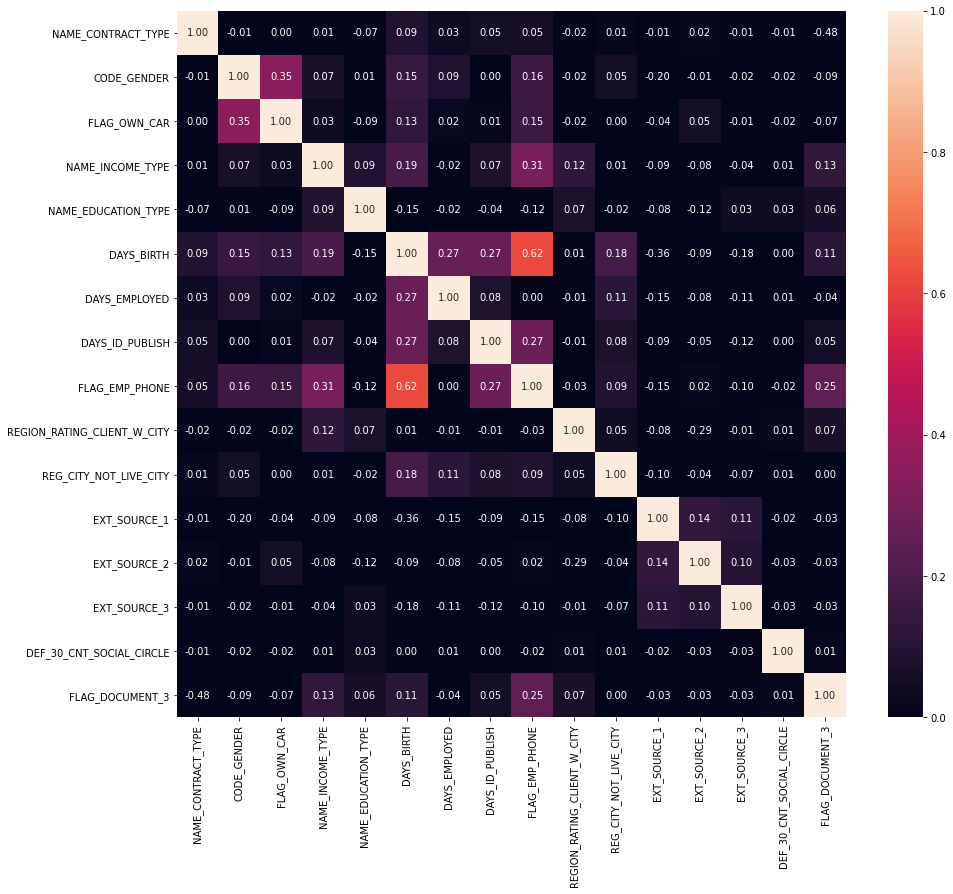

In [267]:
plt.figure(figsize=(15,13))
_ = sns.heatmap(X[final_variables].corr(), annot=True, fmt='.2f', vmin=0, vmax=1)

In [268]:
final_train = pd.concat([X[final_variables],y],axis=1)
final_test = data_test[final_variables]
final_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,
100002,0.0,1.0,0.0,7.0,4.0,-9461.0,-637.0,-2120.0,1.0,2.0,0.0,0.083037,0.262949,0.139376,2.0,1.0,1.0
100003,0.0,0.0,0.0,4.0,1.0,-16765.0,-1188.0,-291.0,1.0,1.0,0.0,0.311267,0.622246,0.510853,0.0,1.0,0.0
100004,1.0,1.0,1.0,7.0,4.0,-19046.0,-225.0,-2531.0,1.0,2.0,0.0,0.502130,0.555912,0.729567,0.0,0.0,0.0
100006,0.0,0.0,0.0,7.0,4.0,-19005.0,-3039.0,-2437.0,1.0,2.0,0.0,0.502130,0.650442,0.510853,0.0,1.0,0.0
100007,0.0,1.0,0.0,7.0,4.0,-19932.0,-3038.0,-3458.0,1.0,2.0,0.0,0.502130,0.322738,0.510853,0.0,0.0,0.0


# Getting predictions

In [269]:
X_train, X_test, y_train, y_test = train_test_split(
    final_train.drop('TARGET', axis=1), final_train['TARGET'], test_size=0.2, random_state=42
)

In [270]:
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000, class_weight='balanced')
fitted_X_train = scaler.fit_transform(X_train)

_ = model.fit(fitted_X_train, y_train)

In [271]:
print('train AUC =', roc_auc_score(y_train, model.predict_proba(fitted_X_train)[:,1]))
print('test AUC =', roc_auc_score(y_test, model.predict_proba(scaler.fit_transform(X_test))[:,1]))

train AUC = 0.7388999890791608
test AUC = 0.7401353836718788


In [272]:
prediction = model.predict_proba(scaler.fit_transform(final_test))
prediction_df = pd.DataFrame(prediction[:,1], index=final_test.index, columns=['TARGET'])
prediction_df.to_csv('submission.csv')

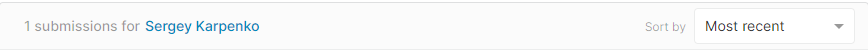

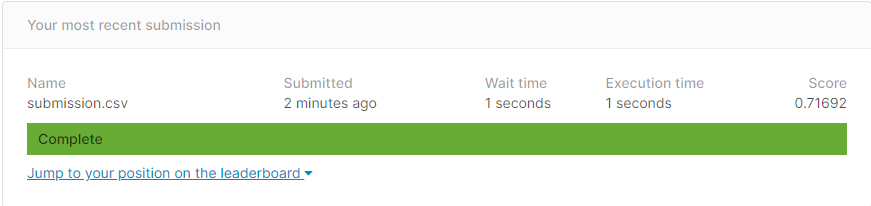